# Data Understanding and Preparation

**Authors:** 
- Marc Villalonga Llobera
- Patxi Juaristi Pagegi

**Date:** 08/01/2024

---

This Jupyter Notebook covers the first task of the project for the Data Mining subject of the Laurea Magistrale of the University of Pisa, focused in data understanding and preparation.


## Environment preparation

First of all, we will install all the required packages, and then import the libraries that we will use:


In [549]:
%%capture
!python -m pip install --upgrade pip
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install geopandas
!pip install scikit-learn
!pip install kneed

In [550]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd

## Dataset reading and analysis

We will read the datasets in order to understand the information that they contain, and adapt them to the desired format.

In [551]:
# Load the three datasets
incidents_dataset = pd.read_csv('../project_datasets/incidents.csv', low_memory=False)
pbsy_dataset = pd.read_csv('../project_datasets/povertyByStateYear.csv')
ysdh_dataset = pd.read_csv('../project_datasets/year_state_district_house.csv')

After reading the datasets, we will execute some commands to have a preview about the information.

With `info()`, we will see the names of the columns of the datasets, the data type and the amount of non null values that they have. With `head()`, the first 5 rows of each dataset, that they will help us to have the idea of the dataset row types. Eventually, with `describe()` we will obtain the statisctical values of the numerical columns.

In [552]:
# Display basic information about each dataset
print("\n------- Incidents Info:-------")
print(incidents_dataset.info())

print("\n------- Dataset 2 Info:-------")
print(pbsy_dataset.info())

print("\n------- Dataset 3 Info:-------")
print(ysdh_dataset.info())


------- Incidents Info:-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       239677 non-null  object 
 1   state                      239677 non-null  object 
 2   city_or_county             239677 non-null  object 
 3   address                    223180 non-null  object 
 4   latitude                   231754 non-null  float64
 5   longitude                  231754 non-null  float64
 6   congressional_district     227733 non-null  float64
 7   state_house_district       200905 non-null  float64
 8   state_senate_district      207342 non-null  float64
 9   participant_age1           147379 non-null  float64
 10  participant_age_group1     197558 non-null  object 
 11  participant_gender1        203315 non-null  object 
 12  min_age_participants       164879 non-null  object 
 1

In [553]:
# Display the first few rows of each dataset
print("------- Incidents -------")
print(incidents_dataset.head())

print("\n------- Poverty By State and Year -------")
print(pbsy_dataset.head())

print("\n------- Year State District House -------")
print(ysdh_dataset.head())

------- Incidents -------
         date                 state city_or_county  \
0  2015-05-02               Indiana   Indianapolis   
1  2017-04-03          Pennsylvania           Kane   
2  2016-11-05              Michigan        Detroit   
3  2016-10-15  District of Columbia     Washington   
4  2030-06-14          Pennsylvania     Pittsburgh   

                              address  latitude  longitude  \
0       Lafayette Road and Pike Plaza   39.8322   -86.2492   
1                           5647 US 6   41.6645   -78.7856   
2   6200 Block of East McNichols Road   42.4190   -83.0393   
3  1000 block of Bladensburg Road, NE   38.9030   -76.9820   
4     California and Marshall Avenues   40.4621   -80.0308   

   congressional_district  state_house_district  state_senate_district  \
0                     7.0                  94.0                   33.0   
1                     5.0                   NaN                    NaN   
2                    14.0                   4.0       

Here we can see that the data types of some of the columns are not correct, so we will fix them. For example, `date` columns has data type `object`, so we will convert it on datetime and some columns that contain numeric values are as `object` type as well, so we will change them. Also here, the modifications are done in the incidents dataset.

In [554]:
# Convert the 'date' column to datetime
incidents_dataset['date'] = pd.to_datetime(incidents_dataset['date'])

# Convert numeric data from object to numeric, handling errors
incidents_dataset['state_senate_district'] = pd.to_numeric(incidents_dataset['state_senate_district'], errors='coerce')
incidents_dataset['min_age_participants'] = pd.to_numeric(incidents_dataset['min_age_participants'], errors='coerce')
incidents_dataset['max_age_participants'] = pd.to_numeric(incidents_dataset['max_age_participants'], errors='coerce')
incidents_dataset['avg_age_participants'] = pd.to_numeric(incidents_dataset['avg_age_participants'], errors='coerce')
incidents_dataset['n_participants_child'] = pd.to_numeric(incidents_dataset['n_participants_child'], errors='coerce').astype('Int64')
incidents_dataset['n_participants_teen'] = pd.to_numeric(incidents_dataset['n_participants_teen'], errors='coerce').astype('Int64')
incidents_dataset['n_participants_adult'] = pd.to_numeric(incidents_dataset['n_participants_adult'], errors='coerce').astype('Int64')

# Verify the data types after conversion
print("\nData Types After Conversion:\n ---- Dataset 1 ----\n", incidents_dataset.dtypes)
print("\n ---- Dataset 2 ----\n", pbsy_dataset.dtypes)
print("\n ---- Dataset 3 ----\n", ysdh_dataset.dtypes)



Data Types After Conversion:
 ---- Dataset 1 ----
 date                         datetime64[ns]
state                                object
city_or_county                       object
address                              object
latitude                            float64
longitude                           float64
congressional_district              float64
state_house_district                float64
state_senate_district               float64
participant_age1                    float64
participant_age_group1               object
participant_gender1                  object
min_age_participants                float64
avg_age_participants                float64
max_age_participants                float64
n_participants_child                  Int64
n_participants_teen                   Int64
n_participants_adult                  Int64
n_males                             float64
n_females                           float64
n_killed                              int64
n_injured               

In [555]:
# Display basic statistics for each dataset
print("\n------- Incidents Statistics:-------")
print(incidents_dataset.describe())

print("\n------- Poverty By State and Year Statistics:-------")
print(pbsy_dataset.describe())

print("\n------- Dataset 3 Statistics:-------")
print(ysdh_dataset.describe())



------- Incidents Statistics:-------
                                date       latitude      longitude  \
count                         239677  231754.000000  231754.000000   
mean   2017-08-21 02:54:15.871860480      37.546598     -89.338348   
min              2013-01-01 00:00:00      19.111400    -171.429000   
25%              2015-07-11 00:00:00      33.903400     -94.158725   
50%              2016-08-25 00:00:00      38.570600     -86.249600   
75%              2017-08-09 00:00:00      41.437375     -80.048625   
max              2030-11-28 00:00:00      71.336800      97.433100   
std                              NaN       5.130763      14.359546   

       congressional_district  state_house_district  state_senate_district  \
count           227733.000000         200905.000000           207342.00000   
mean                 8.001265             55.447132               20.47711   
min                  0.000000              1.000000                1.00000   
25%                

### Datasets columns description

After analyzing the datasets with the previous commands, we will briefly describe each of the columns of the three datasets:

#### Incidents dataset (incidents.csv)

- **Date of Incident (`date`):** This variable represents the date when the gun incident occurred.
- **State (`state`):** Indicates the state where the incident took place.
- **City or County (`city_or_county`):** Specifies the city or county where the incident occurred.
- **Address (`address`):** Represents the specific address where the incident took place.
- **Geographical Coordinates (`latitude, longitude`):** Provides the latitude and longitude of the incident location.
- **Congressional District (`congressional_district`):** Specifies the congressional district where the incident occurred.
- **State House District (`state_house_district`):** Represents the state house district of the incident.
- **State Senate District (`state_senate_district`):** Indicates the state senate district where the incident took place.
- **Participant Age (`participant_age1`):** Represents the exact age of one randomly chosen participant in the incident.
- **Participant Age Group (`participant_age_group1`):** Specifies the age group of one randomly chosen participant.
- **Participant Gender (`participant_gender1`):** Indicates the gender of one randomly chosen participant.
- **Minimum, Average, and Maximum Age of Participants (`min_age_participants, avg_age_participants, max_age_participants`):** Provide statistical measures of participant ages.
- **Number of Participants by Age Group (`n_participants_child, n_participants_teen, n_participants_adult`):** Gives the count of participants in different age groups.
- **Number of Males and Females (`n_males, n_females`):** Specifies the count of male and female participants.
- **Number of People Killed and Injured (`n_killed, n_injured`):** Represents the count of people killed and injured in the incident.
- **Number of Arrested and Unharmed Participants (`n_arrested, n_unharmed`):** Indicates the count of participants arrested and unharmed.
- **Total Number of Participants (`n_participants`):** Represents the total number of participants in the incident.
- **Additional Notes (`notes`):** Provides additional information or notes about the incident.
- **Incident Characteristics (`incident_characteristics1, incident_characteristics2`):** Specifies the characteristics of the incident.

#### Poverty by state and year dataset (povertyByStateYear.csv)

- **State (`state`):** The name of the state.
- **Year (`year`):** The year for which the poverty rate is recorded.
- **Poverty percentage (`povertyPercentage`):** The percentage of the population in poverty for a specific state and year.

#### Year state district house dataset (year_state_district_house.csv)

- **Year (`year`):** The year of the election.
- **State (`state`):** The name of the state for which election results are recorded.
- **State (`congressional_district`):** The congressional district number for which election results are recorded.
- **Party (`party`):** The political party associated with the candidate.
- **Candidate votes (`candidatevotes`):** The number of votes received by a specific candidate in a particular congressional district.
- **Total votes (`totalvotes`):** The total number of votes cast in a particular congressional district.

## Data Quality Assessment

### Missing Values

After having the idea of the content of the dataset, we will perform an analysis of the quality of the data.

Firstly, we will check for missing values in the dataset 1 columns. We will perform this analysis in the dataset of incidents only, because the other two do not have missing values.

With the next graph we can see the distribution of missing values for each column. For example, we can see that the column with more missing values is  `incident_characteristic2`. This occurs because most of the incidents do not have two characteristics, but just one, since we can see that `incident_characteristic1` has almost no missing values.

In [556]:
# Check for missing values
missing_values_i = incidents_dataset.isnull().sum()
print("Nulls in Incidents Dataset\n", missing_values_i)
missing_values_p = pbsy_dataset.isnull().sum()
print("\nNulls in Poverty By State Year Dataset\n", missing_values_p, "\n")
missing_values_y = ysdh_dataset.isnull().sum()
print("\nNulls in Year State District Home Dataset\n", missing_values_y)

Nulls in Incidents Dataset
 date                             0
state                            0
city_or_county                   0
address                      16497
latitude                      7923
longitude                     7923
congressional_district       11944
state_house_district         38772
state_senate_district        32335
participant_age1             92298
participant_age_group1       42119
participant_gender1          36362
min_age_participants         80551
avg_age_participants         80509
max_age_participants         80593
n_participants_child         42109
n_participants_teen          42106
n_participants_adult         42105
n_males                      36362
n_females                    36362
n_killed                         0
n_injured                        0
n_arrested                   27626
n_unharmed                   27626
n_participants                   0
notes                        81017
incident_characteristics1      326
incident_characteristics2  

- Number of Rows in the Original Dataset: 239677


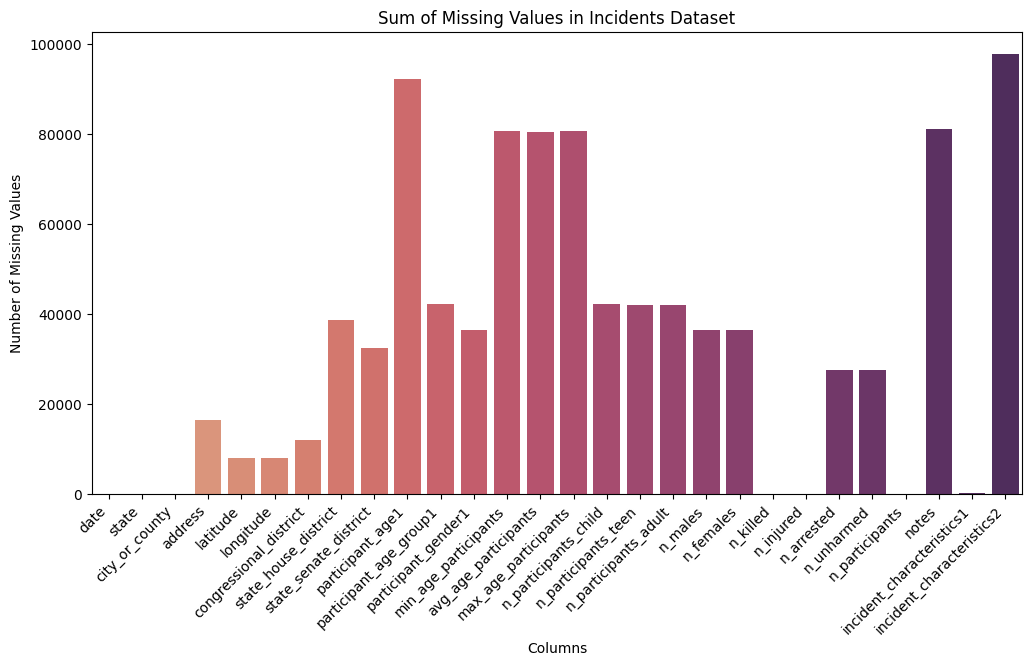

In [557]:
print("- Number of Rows in the Original Dataset:", incidents_dataset.shape[0])
# Plotting the sum of missing values for each column using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values_i.index, y=missing_values_i.values, hue=missing_values_i.index, palette='flare', legend=False)
plt.xticks(rotation=45, ha='right')
plt.title('Sum of Missing Values in Incidents Dataset')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

We see that there is lot of missing values in Incidents Dataset so we can clean some of this. There is some mising values in Poverty By State Year Dataset so we have to clean that too.

#### Clean Incidents Dataset

Cases that do not have the characteristic specified (`incident_characteristics1` = *null*), would be removed, since we would not know what was the incident about, and it does not make sense to analyze them.

The data that doesn't have any `address` and any `latitude` and `longitude` will be eliminated since it does not make sense that an incident has not occurred anywhere and also the number of incidents with this condition is insignificant compared to the number of total incidents. The cases that have an address but no coordinates, or vice versa, would be maintained.

In [558]:
# Eliminate the data that have null in incident_characteristics1, adress, latitude and adress.
columns_to_drop_na = ['incident_characteristics1', 'latitude', 'longitude', 'address']
incidents_dataset.dropna(subset=columns_to_drop_na, how='all', inplace=True)

Next, we will address the missing values in the `participant_age1`, `min_age_participants`, `max_age_participants`, and `avg_age_participants` columns of the incidents dataset. We employ a systematic approach to fill in missing values based on specific priorities. For `participant_age1`, it is filled with values from `avg_age_participants`, `min_age_participants`, or `max_age_participants`, depending on their availability. Similarly, missing values in `min_age_participants`, `avg_age_participants`, and `max_age_participants` are filled using a combination of other available values. The code then compares the number of null values before and after the modifications for each column, providing a quantitative measure of the imputation success. This comprehensive strategy ensures a more complete dataset by leveraging available information across related columns, enhancing the integrity of the age-related data in the incidents dataset.

Checking the results, we can see that there are still many null values in these columns, but in order not to modify the real data too much, we have decided to leave them as they are and not to perform more generalist techniques so as not to distort reality.

In [559]:
# Before modifications
null_participant_age = incidents_dataset['participant_age1'].isnull().sum()
null_min_age_participants = incidents_dataset['min_age_participants'].isnull().sum()
null_max_age_participants = incidents_dataset['max_age_participants'].isnull().sum()
null_avg_age_participants = incidents_dataset['avg_age_participants'].isnull().sum()

# Fill missing values in 'participant_age1'
mask_age1_null = incidents_dataset['participant_age1'].isnull()
incidents_dataset.loc[mask_age1_null, 'participant_age1'] = (
    incidents_dataset['avg_age_participants'].fillna(
        incidents_dataset['min_age_participants'].fillna(
            incidents_dataset['max_age_participants']
        )
    )
)

# Fill missing values in 'min_age_participants'
mask_min_age_null = incidents_dataset['min_age_participants'].isnull()
incidents_dataset.loc[mask_min_age_null, 'min_age_participants'] = (
    incidents_dataset['participant_age1'].fillna(
        incidents_dataset['avg_age_participants'].fillna(
            incidents_dataset['max_age_participants']
        )
    )
)

# Fill missing values in 'avg_age_participants'
mask_avg_age_null = incidents_dataset['avg_age_participants'].isnull()
incidents_dataset.loc[mask_avg_age_null, 'avg_age_participants'] = (
    incidents_dataset[['max_age_participants', 'min_age_participants']].mean(axis=1).fillna(
        incidents_dataset['participant_age1'].fillna(
            incidents_dataset['max_age_participants'].fillna(
                incidents_dataset['min_age_participants']
            )
        )
    )
)

# Fill missing values in 'max_age_participants'
mask_max_age_null = incidents_dataset['max_age_participants'].isnull()
incidents_dataset.loc[mask_max_age_null, 'max_age_participants'] = (
    incidents_dataset['participant_age1'].fillna(
        incidents_dataset['avg_age_participants'].fillna(
            incidents_dataset['min_age_participants']
        )
    )
)

# After modifications
print("\nNumber of null values before and after modifications for participant_age:")
print('Before: ' + str(null_participant_age) + ' - Now: ' + str(incidents_dataset['participant_age1'].isnull().sum()))

print("\nNumber of null values before and after modifications for min_age_participants:")
print('Before: ' + str(null_min_age_participants) + ' - Now: ' + str(incidents_dataset['min_age_participants'].isnull().sum()))

print("\nNumber of null values before and after modifications for max_age_participants:")
print('Before: ' + str(null_max_age_participants) + ' - Now: ' + str(incidents_dataset['max_age_participants'].isnull().sum()))

print("\nNumber of null values before and after modifications for avg_age_participants:")
print('Before: ' + str(null_avg_age_participants) + ' - Now: ' + str(incidents_dataset['avg_age_participants'].isnull().sum()))


Number of null values before and after modifications for participant_age:
Before: 92298 - Now: 71704

Number of null values before and after modifications for min_age_participants:
Before: 80551 - Now: 71704

Number of null values before and after modifications for max_age_participants:
Before: 80593 - Now: 71704

Number of null values before and after modifications for avg_age_participants:
Before: 80509 - Now: 71704


Afterwards, we address missing values in the `participant_age_group1` column of the incidents dataset. The modification is designed to classify the age groups based on the `participant_age1` column, filling in missing values in `participant_age_group1` with the corresponding age group labels (*Child 0-11*, *Teen 12-17*, or *Adult 18+*) according to the defined classification logic.

Notably, the modification is strategically applied only to rows where `participant_age_group1` is initially null, preventing unnecessary updates to existing values. Finally, the code reports the number of null values before and after the modification, where we can see that not much, but some rows have been updated.

In [560]:
null_participant_age_group1 = incidents_dataset['participant_age_group1'].isnull().sum()

# Fill Missing Age Group Column
def set_age_group(age, age_group):
    if pd.notnull(age_group):
        return age_group
    if pd.notnull(age):
        if age < 12:
            return 'Child 0-11'
        elif age < 18:
            return 'Teen 12-17'
        else:
            return 'Adult 18+'
    return None

incidents_dataset['participant_age_group1'] = incidents_dataset.apply(lambda row: set_age_group(row['participant_age1'], 
                                                                                                row['participant_age_group1']), axis=1)

# After modifications
print("\nNumber of null values before and after modifications for participant_age_group1:")
print('Before: ' + str(null_participant_age_group1) + ' - Now: ' + str(incidents_dataset['participant_age_group1'].isnull().sum()))


Number of null values before and after modifications for participant_age_group1:
Before: 42119 - Now: 41923


To finish with the null values, we designed a code to set the participant gender null values. First, we calculate the percentages of male and female genders in the entire dataset based on non-null values of `n_males` and `n_females`. Then we use these percentages to set `participant_gender1` either randomly when both `n_males` and `n_females` are null, or based on the comparison of `n_males` and `n_females` when at least one of them is not null. In this case, we conclude with zero null values, since we have resorted to the use of random values.

In [561]:
# Before modifications
null_participant_gender1_before = incidents_dataset['participant_gender1'].isnull().sum()

# Calculate the percentage of male and female genders in the entire dataset
total_males = incidents_dataset['n_males'].notnull().sum()
total_females = incidents_dataset['n_females'].notnull().sum()
percentage_males = total_males / (total_males + total_females)
percentage_females = total_females / (total_males + total_females)

# Set participant_gender1 based on conditions
mask_both_null = incidents_dataset['n_males'].isnull() & incidents_dataset['n_females'].isnull()
mask_males_greater = incidents_dataset['n_males'] > incidents_dataset['n_females']

probabilities = [percentage_males, percentage_females]

incidents_dataset.loc[mask_both_null, 'participant_gender1'] = np.random.choice(['Male', 'Female'], 
                                                                                size=(mask_both_null & 
                                                                                      incidents_dataset['participant_gender1'].isnull()).sum(), 
                                                                                p=probabilities)
incidents_dataset.loc[mask_males_greater & incidents_dataset['participant_gender1'].isnull(), 'participant_gender1'] = 'Male'
incidents_dataset.loc[~mask_males_greater & incidents_dataset['participant_gender1'].isnull(), 'participant_gender1'] = 'Female'

# After modifications
print("\nNumber of null values before and after modifications for participant_gender1:")
print('Before: ' + str(null_participant_gender1_before) + ' - Now: ' + str(incidents_dataset['participant_gender1'].isnull().sum()))



Number of null values before and after modifications for participant_gender1:
Before: 36362 - Now: 0


In the next chart we can see the difference with the previous one, where some of the columnas do not have any missing values, and others have reduced their total amount.

- Number of Rows in the New Dataset: 239677


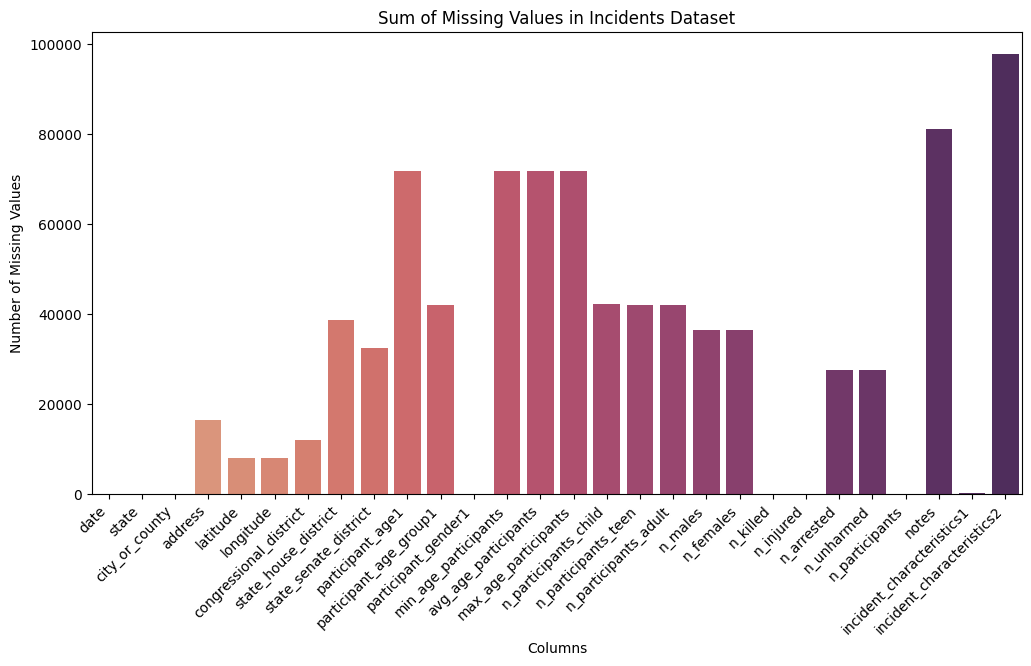

In [562]:
# Print mising values label
missing_values = incidents_dataset.isnull().sum()
print("- Number of Rows in the New Dataset:", incidents_dataset.shape[0])
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, hue=missing_values.index, palette='flare', legend=False)
plt.xticks(rotation=45, ha='right')
plt.title('Sum of Missing Values in Incidents Dataset')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

#### Clean Poverty By State Year Dataset

In [563]:
# Check null values for all years
null_values_by_year = pbsy_dataset.groupby('year')['povertyPercentage'].apply(lambda x: x.isnull().sum()).sort_index()

# Print the result
print(null_values_by_year)

year
2004     0
2005     0
2006     0
2007     0
2008     0
2009     0
2010     0
2011     0
2012    52
2013     0
2014     0
2015     0
2016     0
2017     0
2018     0
2019     0
2020     0
Name: povertyPercentage, dtype: int64


We see that  the only year that doesn't have data is 2012 so we will drop all the NaN due to there is no information we can extract from there

In [564]:
pbsy_dataset = pbsy_dataset.dropna()
print(pbsy_dataset.isna().sum())

state                0
year                 0
povertyPercentage    0
dtype: int64


### Duplicated Records

After that, we will check for duplicated values in the datasets.

In [565]:
# Check for duplicates
d1_duplicates = incidents_dataset.duplicated().sum()
print("- Number of Duplicates:", d1_duplicates)

# Check for duplicates
d2_duplicates = pbsy_dataset.duplicated().sum()
print("- Number of Duplicates:", d2_duplicates)

# Check for duplicates
d3_duplicates = ysdh_dataset.duplicated().sum()
print("- Number of Duplicates:", d3_duplicates)


- Number of Duplicates: 174
- Number of Duplicates: 0
- Number of Duplicates: 0


We can see that the incidents dataset is the only one that has duplicates, so we remove them and then verify that we have done it correctly.

In [566]:
# Remove duplicate rows
incidents_dataset.drop_duplicates(inplace=True)

# Verify the removal of duplicates
d1_duplicates_after_removal = incidents_dataset.duplicated().sum()
print("\n- Number of Duplicates After Removal:", d1_duplicates_after_removal)


- Number of Duplicates After Removal: 0


After that, and before starting with further modifications, we will establish the same capitalization for the state column, because the elections dataset has the state in upper case, while the other two not. This will help with further merge and analysis.

In [567]:

incidents_dataset['state'] = incidents_dataset['state'].str.upper()
pbsy_dataset['state'] = pbsy_dataset['state'].str.upper()
ysdh_dataset['state'] = ysdh_dataset['state'].str.upper()

## Distribution of variables

Then, we will see the distribution of the variables in the different datasest.

### Poverty percentages evaluation

To start, we will see the distribution of the poverty rates by states.

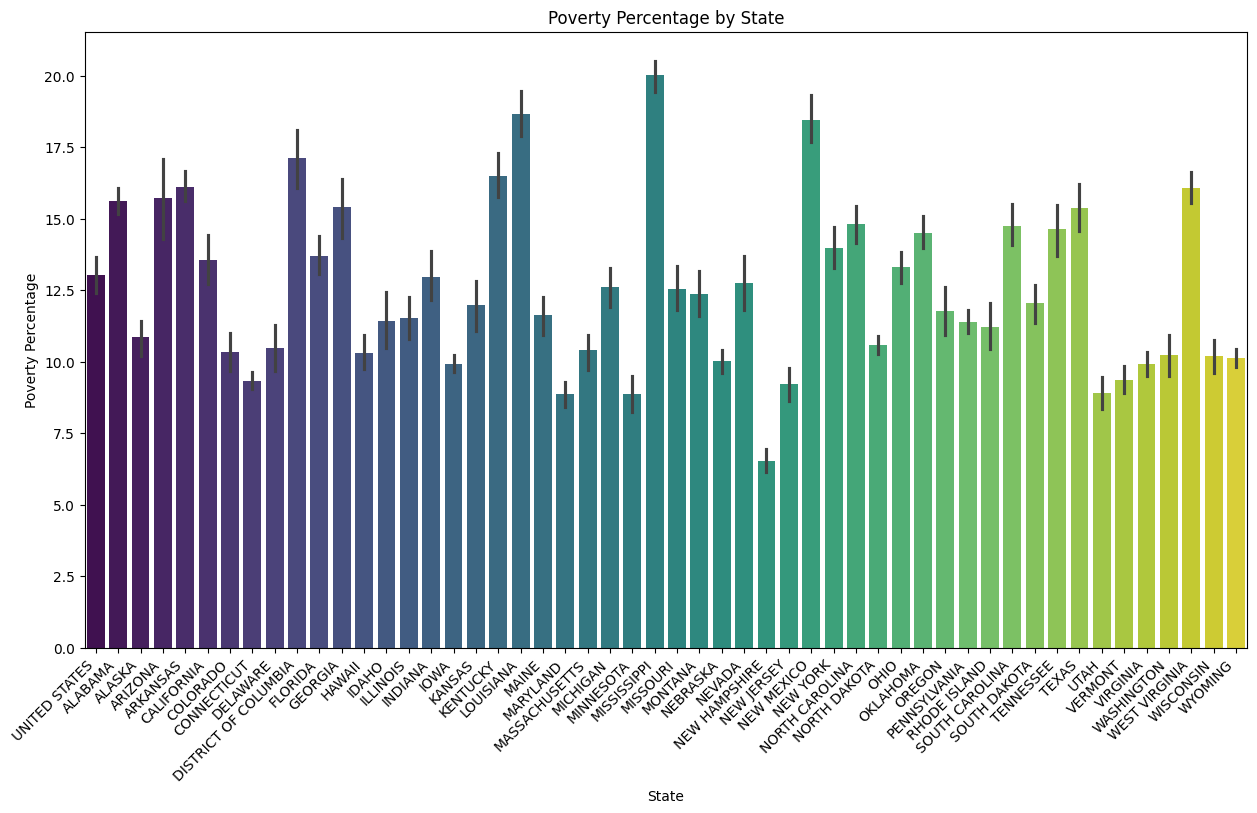

In [568]:
plt.figure(figsize=(15, 8))
sns.barplot(data=pbsy_dataset, x='state', y='povertyPercentage', hue='state', palette='viridis', dodge=False)
plt.title('Poverty Percentage by State')
plt.xlabel('State')
plt.ylabel('Poverty Percentage')
plt.xticks(rotation=45, ha='right')
plt.show()

In the previous chart, we can see that the first state is "United States". This is not correct, because the United States is the country, but not a state. Even tough we will not remove or modify it, we have to take it into account when doing analysis. In the cases that we analyze global poverty rates among the country, there is no problem using this dataset, but if we want to distinguish among states, or make analysis where the states have relevance, we should remove the rows that have the column state as "United States". After all the modifications we will create two different datasets for each case.

Then, we will make a boxplot so see the evolution of the poverty over the years, as well as the distribution of the poverty ranges in each year.

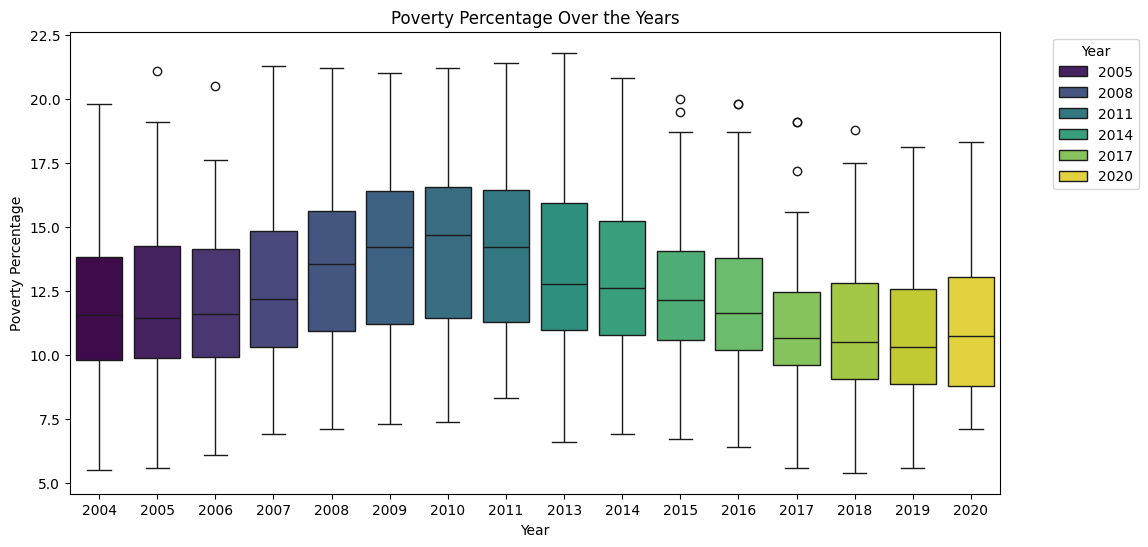

In [569]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=pbsy_dataset, x='year', y='povertyPercentage', hue='year', palette='viridis', dodge=False)
plt.title('Poverty Percentage Over the Years')
plt.xlabel('Year')
plt.ylabel('Poverty Percentage')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


We can see in the previous graph that there are no values in the year 2012, since we check before that 2012 values were with null values and we have removed them.

To conclude, with all the modifications done, we will see the general distribution of the poverty rates throughout all the US. We can see that even tough there are some rates that are higher, the distribution is skewed right.

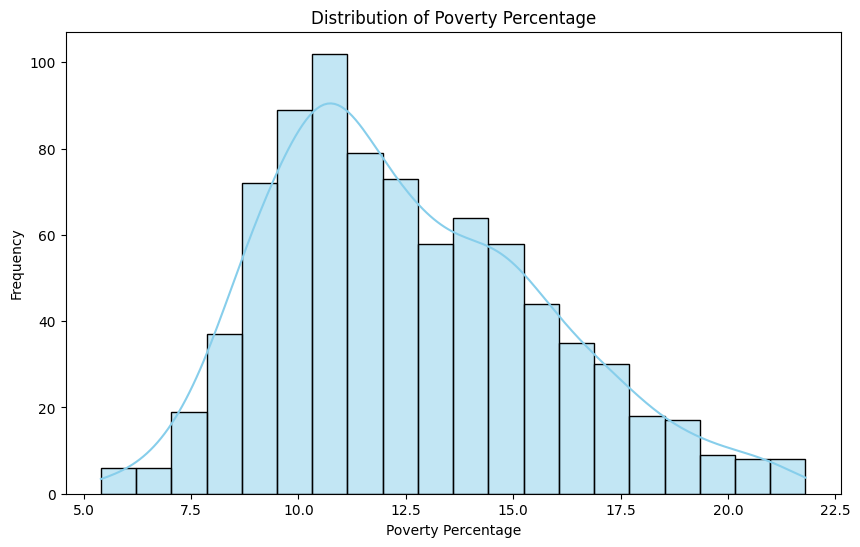

In [570]:
plt.figure(figsize=(10, 6))
sns.histplot(data=pbsy_dataset, x='povertyPercentage', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Poverty Percentage')
plt.xlabel('Poverty Percentage')
plt.ylabel('Frequency')
plt.show()


After all the modifications we will create the two datasets with and without the "United States" as state.

In [571]:
# Filter rows with 'United States' as state in pbsy_dataset
pbsy_dataset_only_states = pbsy_dataset[pbsy_dataset['state'] != 'United States']

### Evaluation of elections dataset

Similar analysis will be performed for the elections dataset. Firstly, we will check the evolution of the amount of votes per year. In general, we can say that the participation in the elections has been increasing by the years.

Nevertheless, we know that the elections are every 4 years, while in this dataset there are entries every 2 years. That's why in the graph we can see the difference in the amount of votes every two years. We assume that this votes correspond to the midterm that the US does for the elections. For now we will keep it until concluding with the modifications. After finishing with the modifications we will separate in two datasets: one with all the voting campaigns and the other one just with the elections.

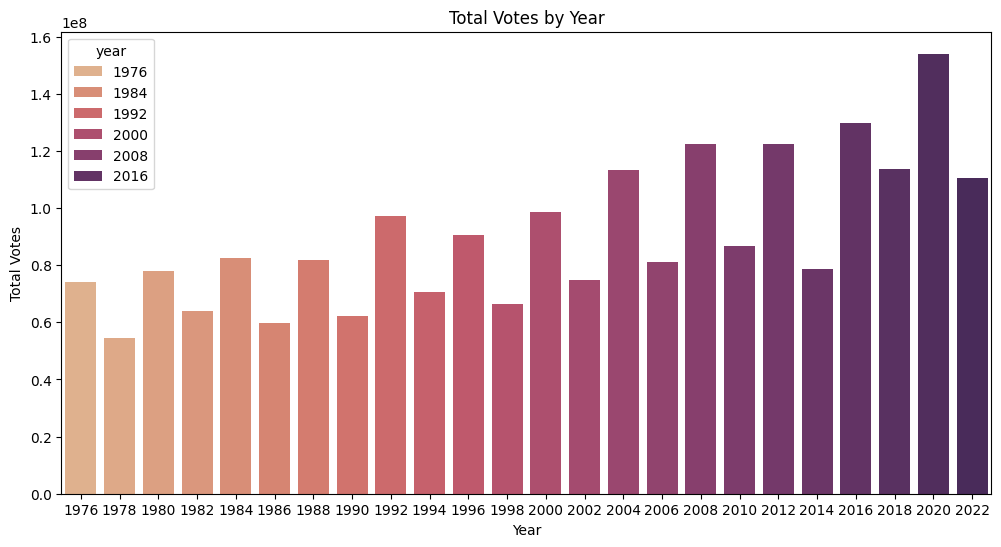

In [572]:
yearly_total_votes = ysdh_dataset.groupby('year')['totalvotes'].sum().reset_index(name='total_votes')

plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_total_votes, x='year', y='total_votes', hue='year', palette='flare')
plt.title('Total Votes by Year')
plt.xlabel('Year')
plt.ylabel('Total Votes')
plt.show()


With the scatter plot of the relations between candidate votes and total votes, we can detect some anomalies in the dataset. We have many values in the (0,0), which means that `candidatevotes` and `totalvotes` are the same and also we can see points in the top right of the chart with huge values, which are clearly anomalies as well.

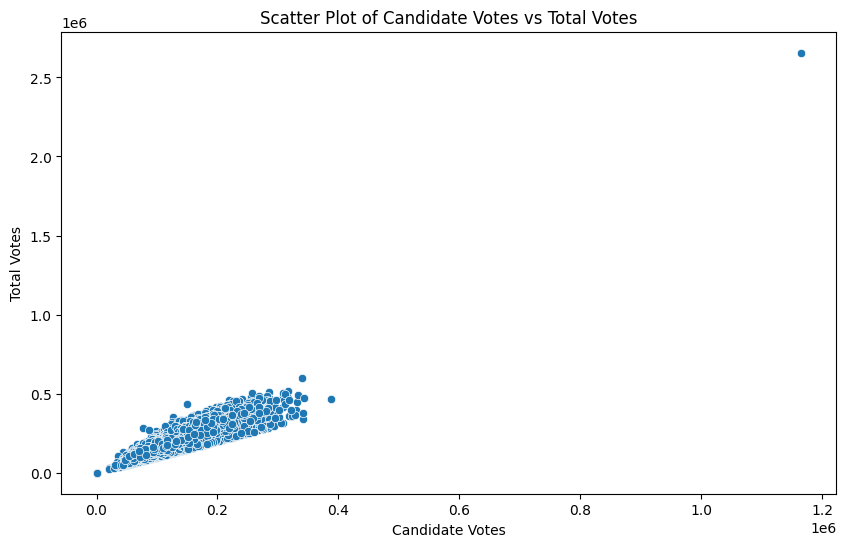

In [573]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='candidatevotes', y='totalvotes', data=ysdh_dataset)
plt.title('Scatter Plot of Candidate Votes vs Total Votes')
plt.xlabel('Candidate Votes')
plt.ylabel('Total Votes')
plt.show()


To fix that we calculate the Interquartile Range (IQR) for both `candidatevotes` and `totalvotes`, a measure of statistical dispersion based on quartiles, which is used to define upper and lower bounds for identifying outliers. Quartiles divide a dataset into four equal parts. The first quartile (Q1) represents the 25th percentile, and the third quartile (Q3) represents the 75th percentile. The IQR is the range between Q1 and Q3. Outliers were identified by defining bounds outside 1.5 times the IQR from the quartiles. This method is effective for detecting data points that deviate significantly from the central tendency of the dataset.

Those entires that deviate from the tendency have been removed from the main dataset, to ensure that our subsequent analyses and visualizations are not influenced by extreme values.

In [574]:
# Calculate the IQR for 'candidatevotes' and 'totalvotes'
Q1_candidate = ysdh_dataset['candidatevotes'].quantile(0.25)
Q3_candidate = ysdh_dataset['candidatevotes'].quantile(0.75)
IQR_candidate = Q3_candidate - Q1_candidate

Q1_total = ysdh_dataset['totalvotes'].quantile(0.25)
Q3_total = ysdh_dataset['totalvotes'].quantile(0.75)
IQR_total = Q3_total - Q1_total

# Define the upper and lower bounds for outliers
lower_bound_candidate = Q1_candidate - 1.5 * IQR_candidate
upper_bound_candidate = Q3_candidate + 1.5 * IQR_candidate

lower_bound_total = Q1_total - 1.5 * IQR_total
upper_bound_total = Q3_total + 1.5 * IQR_total

# Identify outliers
outliers = ((ysdh_dataset['candidatevotes'] < lower_bound_candidate) | 
            (ysdh_dataset['candidatevotes'] > upper_bound_candidate) |
            (ysdh_dataset['totalvotes'] < lower_bound_total) |
            (ysdh_dataset['totalvotes'] > upper_bound_total))

# Print the number of outliers
print("In the dataset there are " + str(ysdh_dataset[outliers].shape[0]) + " outliers")
print(ysdh_dataset[outliers].head())

# Remove outliers
ysdh_dataset = ysdh_dataset[~outliers]


In the dataset there are 372 outliers
    year     state  congressional_district       party  candidatevotes  \
14  1976  ARKANSAS                       3  REPUBLICAN               1   
15  1976  ARKANSAS                       4    DEMOCRAT               1   
71  1976   FLORIDA                       1    DEMOCRAT               1   
72  1976   FLORIDA                       2    DEMOCRAT               1   
73  1976   FLORIDA                       3    DEMOCRAT               1   

    totalvotes  
14           1  
15           1  
71           1  
72           1  
73           1  


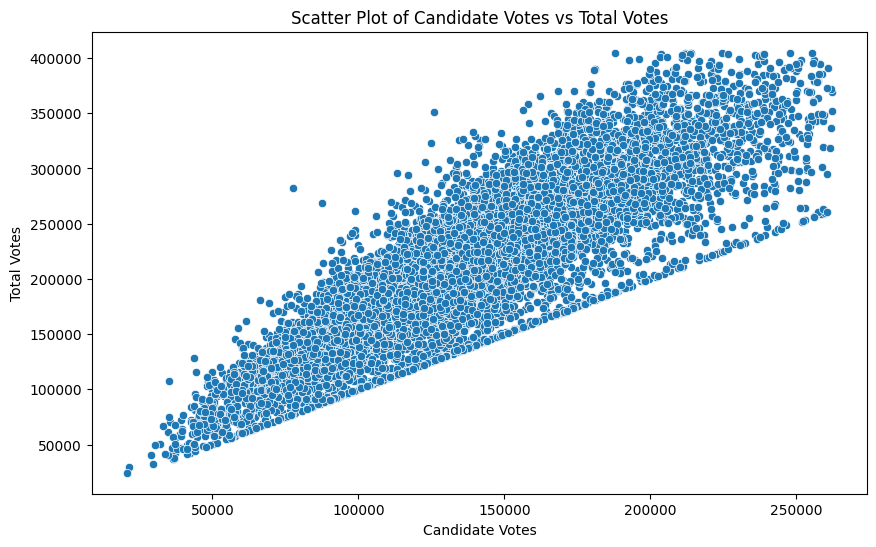

In [575]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='candidatevotes', y='totalvotes', data=ysdh_dataset)
plt.title('Scatter Plot of Candidate Votes vs Total Votes')
plt.xlabel('Candidate Votes')
plt.ylabel('Total Votes')
plt.show()

Apart from that the big problem that we have with this dataset is its structure. The elections results are divided by states, which it is correct, but also by congressional districts, which is not relevant for our analysis.

Moreover, we do not have the information about the amount of votes that each party obtained in each congressional district. We only know which party was the winner in each congressional party, and how many votes they got. Then we have the total amount of votes, but we do not know how are distributed among the rest of the parties.

As an example, we will get the first year and the first state (1976 and Alabama):

In [576]:
rows_1976_alabama = ysdh_dataset[(ysdh_dataset['year'] == 1976) & (ysdh_dataset['state'] == 'ALABAMA')]
print(rows_1976_alabama)

   year    state  congressional_district       party  candidatevotes  \
0  1976  ALABAMA                       1  REPUBLICAN           98257   
1  1976  ALABAMA                       2  REPUBLICAN           90069   
2  1976  ALABAMA                       3    DEMOCRAT          106935   
3  1976  ALABAMA                       4    DEMOCRAT          141490   
4  1976  ALABAMA                       5    DEMOCRAT          113553   
5  1976  ALABAMA                       6  REPUBLICAN           92113   
6  1976  ALABAMA                       7    DEMOCRAT          110496   

   totalvotes  
0      157170  
1      156362  
2      108048  
3      176022  
4      113560  
5      162518  
6      110501  


In [577]:
alabama_1976_d1 = rows_1976_alabama.iloc[0]

print('- Votes for Republicans in Alabama district 1: ' + str(alabama_1976_d1['candidatevotes']))
print('- Votes for other parties in Alabama district 1: ' + str(alabama_1976_d1['totalvotes'] - alabama_1976_d1['candidatevotes']))

- Votes for Republicans in Alabama district 1: 98257
- Votes for other parties in Alabama district 1: 58913


Since in the US mainly all the votes goes for republicans and democrats, it could be said that the other votes, could be set to the other party in each row. However, we check that the dataset has more parties apart from republicans and democrats, so this modification would not be entirely correct.

In [578]:
unique_parties = ysdh_dataset['party'].unique()
print("Different Parties:", unique_parties)

Different Parties: ['REPUBLICAN' 'DEMOCRAT' 'FOGLIETTA (DEMOCRAT)' 'DEMOCRATIC-FARMER-LABOR'
 'INDEPENDENT' 'INDEPENDENT-REPUBLICAN']


Anyway, we checked which is the percentage that these little parties occupy in the results. The result was less than a 1% of the entire votes during the history.

In [579]:
total_votes_by_party = ysdh_dataset.groupby('party')['totalvotes'].sum().reset_index()

# Calculate the percentage of total votes for each party
total_votes_by_party['percentage'] = (total_votes_by_party['totalvotes'] / total_votes_by_party['totalvotes'].sum()) * 100

print(total_votes_by_party)

# Filter out Republicans and Democrats
other_parties = total_votes_by_party[~total_votes_by_party['party'].isin(['REPUBLICAN', 'DEMOCRAT'])]

# Calculate the sum of the percentage for other parties
sum_percentage_other_parties = other_parties['percentage'].sum()

print(f"\nSum of the percentage for other parties: {sum_percentage_other_parties:.2f}%")

                     party  totalvotes  percentage
0                 DEMOCRAT  1026661219   49.116889
1  DEMOCRATIC-FARMER-LABOR    15316122    0.732744
2     FOGLIETTA (DEMOCRAT)      155451    0.007437
3              INDEPENDENT     2421494    0.115848
4   INDEPENDENT-REPUBLICAN      615754    0.029459
5               REPUBLICAN  1045070670   49.997623

Sum of the percentage for other parties: 0.89%


Therefore, we decide to remove these parties and just have the republicans and democrats.

- *FOGLIETTA (DEMOCRAT)* will convert in *DEMOCRAT*
- *DEMOCRATIC-FARMER-LABOR* will convert in DEMOCRAT
- *INDEPENDENT* will convert randomly in *DEMOCRAT* or *REPUBLICAN*
- *INDEPENDENT-REPUBLICAN* will convert in *REPUBLICAN*

In [580]:
# Update 'party' column
ysdh_dataset['party'] = np.where(ysdh_dataset['party'] == 'FOGLIETTA (DEMOCRAT)', 'DEMOCRAT', ysdh_dataset['party'])
ysdh_dataset['party'] = np.where(ysdh_dataset['party'] == 'DEMOCRATIC-FARMER-LABOR', 'DEMOCRAT', ysdh_dataset['party'])
ysdh_dataset['party'] = np.where(ysdh_dataset['party'] == 'INDEPENDENT-REPUBLICAN', 'REPUBLICAN', ysdh_dataset['party'])

# Randomly assign 'DEMOCRAT' or 'REPUBLICAN' for 'INDEPENDENT'
independent_indices = ysdh_dataset[ysdh_dataset['party'] == 'INDEPENDENT'].index
ysdh_dataset.loc[independent_indices, 'party'] = np.random.choice(['DEMOCRAT', 'REPUBLICAN'], size=len(independent_indices))

# Verify the changes
print(ysdh_dataset['party'].unique())

['REPUBLICAN' 'DEMOCRAT']


After having just the two main parties, the first modification of the dataset will be to include two new columns: `republican_votes` and `democrat_votes`.

If the party is republican, we know that `candidatevotes` are republican votes, so the rest are democrats votes (`totalvotes` - `candidatevotes`), and the same in the opposite way. In order to take into account the remaining votes for other political parties, we have reduced the calculation of the remaining votes to 1% (which is the average obtained previously, 0.87%).

In [581]:
def calculate_votes(row):
    resting_coef = 0.01
    if row['party'] == 'REPUBLICAN':
        return pd.Series([row['candidatevotes'], round((row['totalvotes'] - row['candidatevotes']) * (1 - resting_coef))])
    else:
        return pd.Series([round((row['totalvotes'] - row['candidatevotes']) * (1 - resting_coef)), row['candidatevotes']])

# Apply the custom function to create new columns
ysdh_dataset[['republican_votes', 'democrat_votes']] = ysdh_dataset.apply(calculate_votes, axis=1)

# Print the updated dataset
print(ysdh_dataset.head())

   year    state  congressional_district       party  candidatevotes  \
0  1976  ALABAMA                       1  REPUBLICAN           98257   
1  1976  ALABAMA                       2  REPUBLICAN           90069   
2  1976  ALABAMA                       3    DEMOCRAT          106935   
3  1976  ALABAMA                       4    DEMOCRAT          141490   
4  1976  ALABAMA                       5    DEMOCRAT          113553   

   totalvotes  republican_votes  democrat_votes  
0      157170             98257           58324  
1      156362             90069           65630  
2      108048              1102          106935  
3      176022             34187          141490  
4      113560                 7          113553  


After this modification we can remove the `candidatevotes` columns, because it is useless for us.

In [582]:
# Drop the 'candidatevotes' column
ysdh_dataset.drop('candidatevotes', axis=1, inplace=True)

# Print the updated dataset
print(ysdh_dataset[0:10])

   year    state  congressional_district       party  totalvotes  \
0  1976  ALABAMA                       1  REPUBLICAN      157170   
1  1976  ALABAMA                       2  REPUBLICAN      156362   
2  1976  ALABAMA                       3    DEMOCRAT      108048   
3  1976  ALABAMA                       4    DEMOCRAT      176022   
4  1976  ALABAMA                       5    DEMOCRAT      113560   
5  1976  ALABAMA                       6  REPUBLICAN      162518   
6  1976  ALABAMA                       7    DEMOCRAT      110501   
7  1976   ALASKA                       0  REPUBLICAN      118208   
8  1976  ARIZONA                       1  REPUBLICAN      168119   
9  1976  ARIZONA                       2    DEMOCRAT      182128   

   republican_votes  democrat_votes  
0             98257           58324  
1             90069           65630  
2              1102          106935  
3             34187          141490  
4                 7          113553  
5             92113    

To conclude with the modifications, we will remove the congressional_district information and merge the rows that have the same year and state. This way, we will have the information about the votes that each party has obtained in each year and state, which has been the winner, and the total amount of votes pero party and in total.

In [583]:
# Group by 'year' and 'state', summing up the votes
voting_grouped_data = ysdh_dataset.groupby(['year', 'state']).agg({
    'totalvotes': 'sum',
    'republican_votes': 'sum',
    'democrat_votes': 'sum'
}).reset_index()

# Update the 'party' column based on the comparison of votes
voting_grouped_data['party'] = voting_grouped_data.apply(lambda row: 'REPUBLICAN' if row['republican_votes'] > row['democrat_votes'] else 'DEMOCRAT', axis=1)

# Print the updated dataset
print(voting_grouped_data.head())

   year       state  totalvotes  republican_votes  democrat_votes       party
0  1976     ALABAMA      984181            315740          666129    DEMOCRAT
1  1976      ALASKA      118208             83722           34141  REPUBLICAN
2  1976     ARIZONA      729002            362192          363365    DEMOCRAT
3  1976    ARKANSAS      336389             74638          260997    DEMOCRAT
4  1976  CALIFORNIA     7442501           3266248         4150218    DEMOCRAT


Now that me conclude with the fixing, we will separate the dataset in two: one with all the voting campaigns and the other one just with the elections.

In [584]:
midterm_dataset = voting_grouped_data[voting_grouped_data['year'] % 4 != 0]
elections_dataset = voting_grouped_data[voting_grouped_data['year'] % 4 == 0]

# Display or print the first few rows to verify
print("Mid term voting dataset:")
print(midterm_dataset['year'].unique())

print("\nElections dataset:")
print(elections_dataset['year'].unique())

Mid term voting dataset:
[1978 1982 1986 1990 1994 1998 2002 2006 2010 2014 2018 2022]

Elections dataset:
[1976 1980 1984 1988 1992 1996 2000 2004 2008 2012 2016 2020]


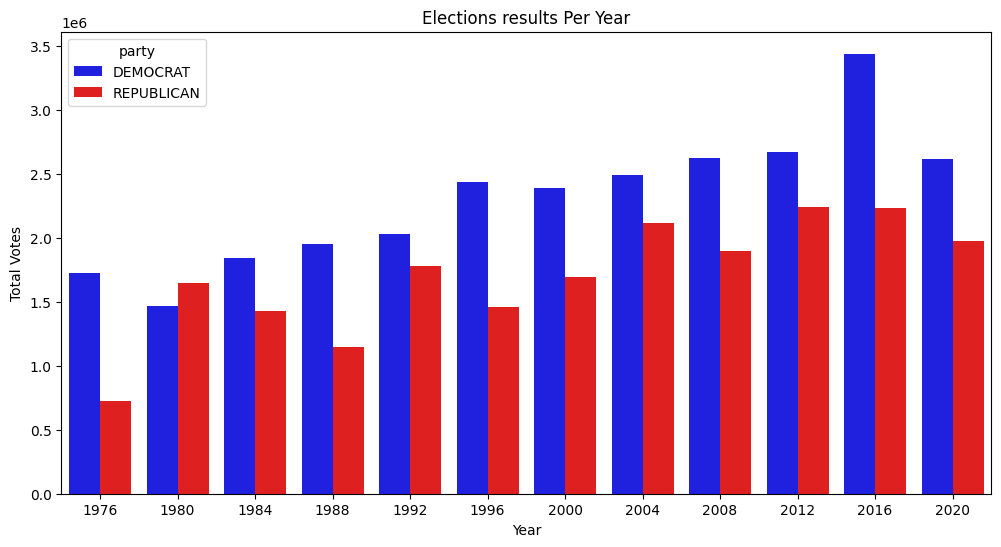

In [585]:
# Plot the total votes for each party per year
plt.figure(figsize=(12, 6))
sns.barplot(data=elections_dataset, x='year', y='totalvotes', hue='party', palette={'DEMOCRAT': 'blue', 'REPUBLICAN': 'red'}, errorbar=None)
plt.title('Elections results Per Year')
plt.xlabel('Year')
plt.ylabel('Total Votes')
plt.show()

### Evolution of incidents over time

The evolution of the incidents over time is one of the most relevant topics to analyze, so in the next graph we display it. We can see something strange. There are values that start around 2014, that finish around middle of 2018, and then values that restart in 2028. We don't know why that data is in the dataset, if by mistake or if it is some kind of prediction that they have made, where they have the incident data that they would like to have for the future. Whatever it is, for our analysis the future data is not relevant, so we are going to remove it.

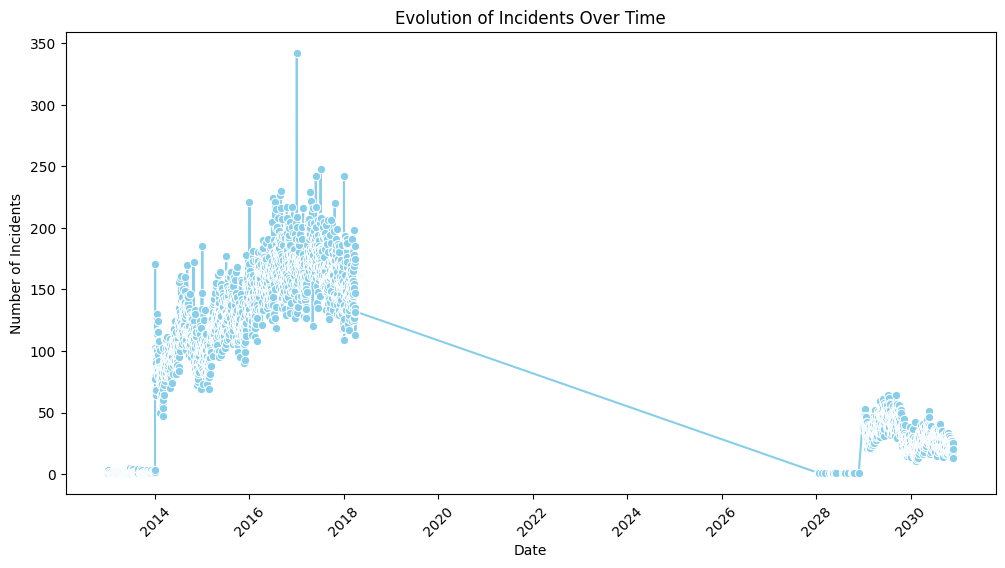

In [586]:
# Count the number of incidents for each date
incident_counts = incidents_dataset['date'].value_counts().sort_index()

# Plotting the evolution of the amount of incidents over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=incident_counts.index, y=incident_counts.values, marker='o', color='skyblue')
plt.title('Evolution of Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

In [587]:
# Filter out rows with 'date' in the future
incidents_dataset = incidents_dataset[incidents_dataset['date'].dt.year < 2028]

# Verify the changes
print(incidents_dataset['date'].describe())

count                           216495
mean     2016-05-04 04:55:09.815007232
min                2013-01-01 00:00:00
25%                2015-05-27 00:00:00
50%                2016-06-19 00:00:00
75%                2017-05-05 00:00:00
max                2018-03-31 00:00:00
Name: date, dtype: object


Next issue that we can see is the difference between the incidents until 2014, with the incidents between 2014 and 2018. This does not occur because 2013 was the safest year of the history, but because there are way less values in the dataset than in the rest of the years. Therefore, in order not to alter the results, we have decided to remove entries older than 2014.

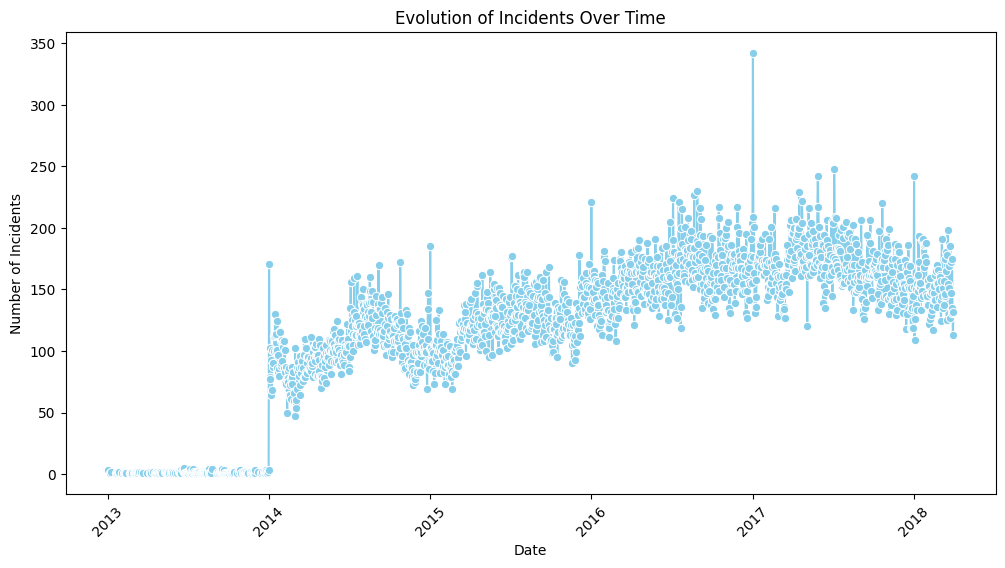

In [588]:
# Count the number of incidents for each date
incident_counts = incidents_dataset['date'].value_counts().sort_index()

# Plotting the evolution of the amount of incidents over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=incident_counts.index, y=incident_counts.values, marker='o', color='skyblue')
plt.title('Evolution of Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

In [589]:
# Extract the year from the 'date' column and create a new 'year' column
incidents_dataset['year'] = incidents_dataset['date'].dt.year

# Count the number of incidents by year
incident_counts_by_year = incidents_dataset['year'].value_counts().sort_index()

# Display the counts
print("Number of Incidents by Year:")
print(incident_counts_by_year)

Number of Incidents by Year:
year
2013      253
2014    37627
2015    44678
2016    58744
2017    61392
2018    13801
Name: count, dtype: int64


In [590]:
# Filter out rows with 'date' in the future
incidents_dataset = incidents_dataset[incidents_dataset['date'].dt.year > 2013]

# Verify the changes
print(incidents_dataset['date'].describe())

count                           216242
mean     2016-05-05 09:35:26.517512960
min                2014-01-01 00:00:00
25%                2015-05-29 00:00:00
50%                2016-06-20 00:00:00
75%                2017-05-05 00:00:00
max                2018-03-31 00:00:00
Name: date, dtype: object


Final result of the plot would be the next one:

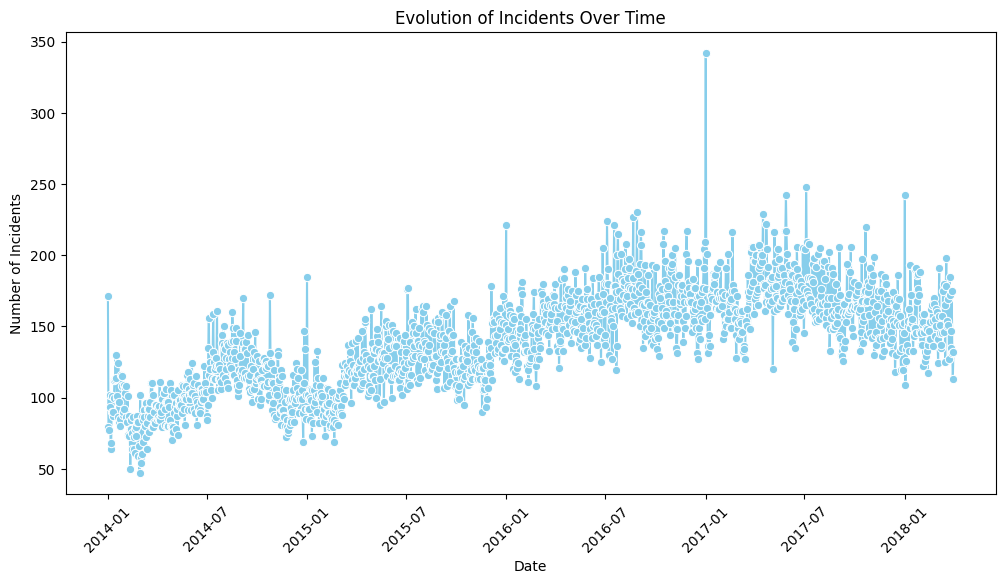

In [591]:
# Count the number of incidents for each date
incident_counts = incidents_dataset['date'].value_counts().sort_index()

# Plotting the evolution of the amount of incidents over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=incident_counts.index, y=incident_counts.values, marker='o', color='skyblue')
plt.title('Evolution of Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

### Geographical distribution of incidents

To show the geographical distribution of the incidents, we have used `geopandas`:

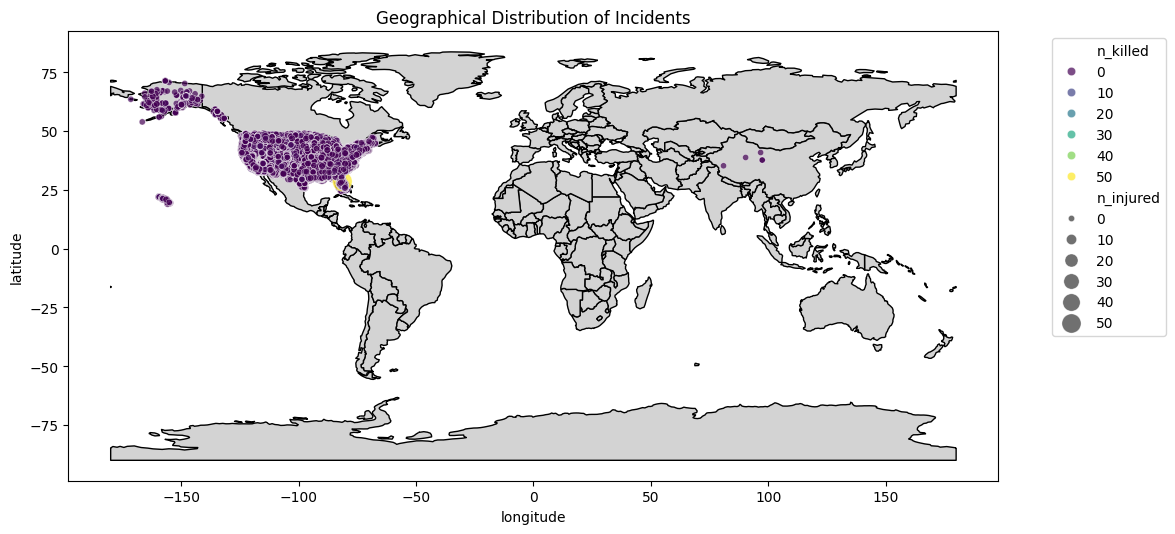

In [592]:
world_filepath = '../110m_cultural/ne_110m_admin_0_countries.shp'
world = gpd.read_file(world_filepath)

# Create a GeoDataFrame from the incidents_dataset DataFrame
gdf = gpd.GeoDataFrame(incidents_dataset, geometry=gpd.points_from_xy(incidents_dataset.longitude, incidents_dataset.latitude))

# Plot the world map
world.plot(figsize=(12, 8), color='lightgrey', edgecolor='black')

# Plot the scatter plot on top of the world map
scatter_plot = sns.scatterplot(x='longitude', y='latitude', data=incidents_dataset, hue='n_killed', palette='viridis',
                               size='n_injured', sizes=(20, 200), alpha=0.7)

# Move the legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Geographical Distribution of Incidents')
plt.show()

#### Geographical data fixing

As we see in the data understanding section, there were some outliers in the geographical data, since it was visible that there were some incidents around India, when there would be just incidents from the USA.

To fix that we refined the filtering criteria based on the latitude and longitude values. We set the latitude and longitude ranges to cover the area of the United States, including Alaska and Hawaii that have different coordinates that the main US region. These adjusted ranges ensure that incidents falling within the geographical coordinates of the entire United States are retained in the filtered dataset. This refined filtering approach allows for the accurate representation of incident locations on the geographical scatter plot while eliminating data points located outside the intended area of interest.

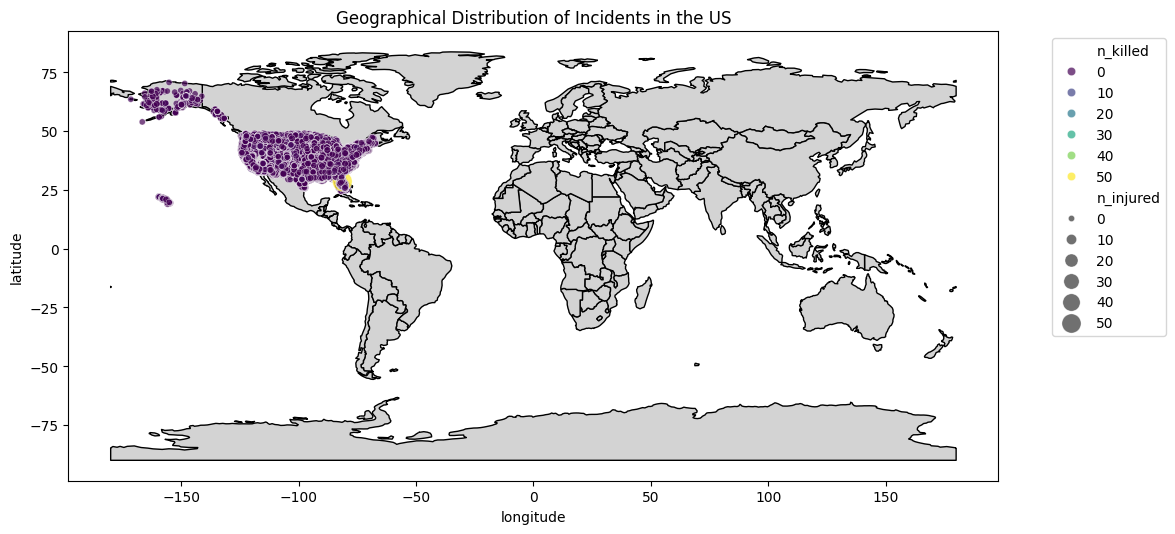

In [593]:
# Assuming the latitude and longitude ranges for the United States
us_latitude_range = (18, 71)
us_longitude_range = (-179, -66)

# Filter out incidents outside the US coordinates
incidents_dataset_us = incidents_dataset[(incidents_dataset['latitude'].between(*us_latitude_range)) &
                        (incidents_dataset['longitude'].between(*us_longitude_range))]

# Create a GeoDataFrame from the filtered dataset
gdf_us = gpd.GeoDataFrame(incidents_dataset_us, geometry=gpd.points_from_xy(incidents_dataset_us.longitude, incidents_dataset_us.latitude))

# Plot the world map
world_filepath = './110m_cultural/ne_110m_admin_0_countries.shp'
world.plot(figsize=(12, 8), color='lightgrey', edgecolor='black')

# Plot the scatter plot on top of the world map for the US incidents
scatter_plot = sns.scatterplot(x='longitude', y='latitude', data=incidents_dataset_us, hue='n_killed', palette='viridis',
                               size='n_injured', sizes=(20, 200), alpha=0.7)

# Move the legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Geographical Distribution of Incidents in the US')
plt.show()


### Distribution of participant age

Knowing the characteristics of the participants in the incidents it is one of the keys of our analysis, so we will start with the age of the participants. In the next graph we can have a preview of the distribution of the ages. We can see that the distribution is very weird. This occurred because there were some outliers with rare values, and when we add the age values to replace the missing values, this outliers modify everything.

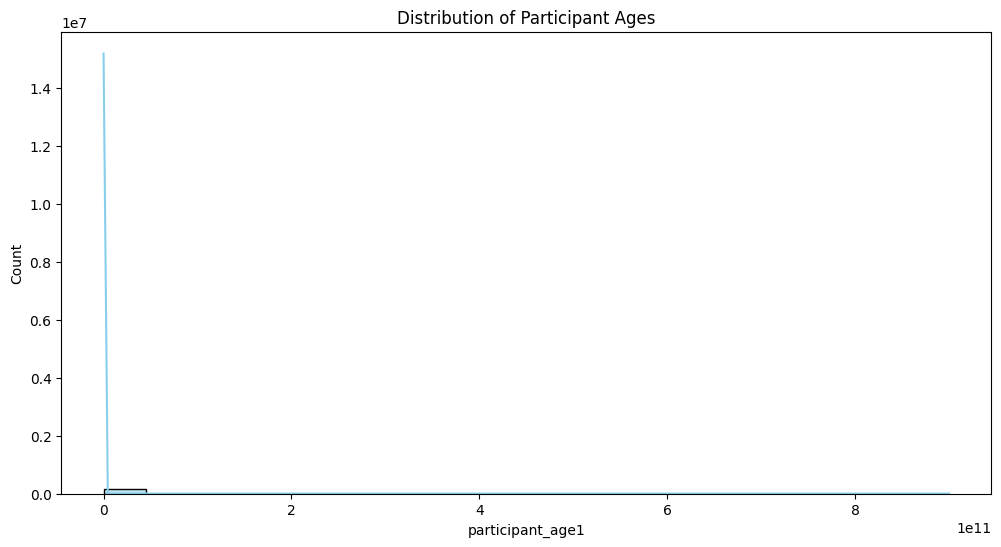

In [594]:
plt.figure(figsize=(12, 6))
sns.histplot(data=incidents_dataset, x='participant_age1', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Participant Ages')
plt.show()

This can be confirmed looking to the describe command:

In [595]:
print(incidents_dataset['participant_age1'].describe())

count    1.675960e+05
mean     5.406426e+06
std      2.198421e+09
min     -1.000000e+03
25%      2.000000e+01
50%      2.700000e+01
75%      3.900000e+01
max      9.000000e+11
Name: participant_age1, dtype: float64


Because this problem, we will just keep the values that have ages between 0 and 100 years.

In [596]:
# Keep ages between 5 and 110
incidents_dataset = incidents_dataset[(incidents_dataset['participant_age1'] >= 1) & (incidents_dataset['participant_age1'] <= 110)]


# Verify the changes
print(incidents_dataset['participant_age1'].describe())

count    146951.000000
mean         30.305047
std          13.323545
min           1.000000
25%          21.000000
50%          27.000000
75%          37.000000
max         101.000000
Name: participant_age1, dtype: float64


Now, if we look to the distribution, we can see an understandable distribution.

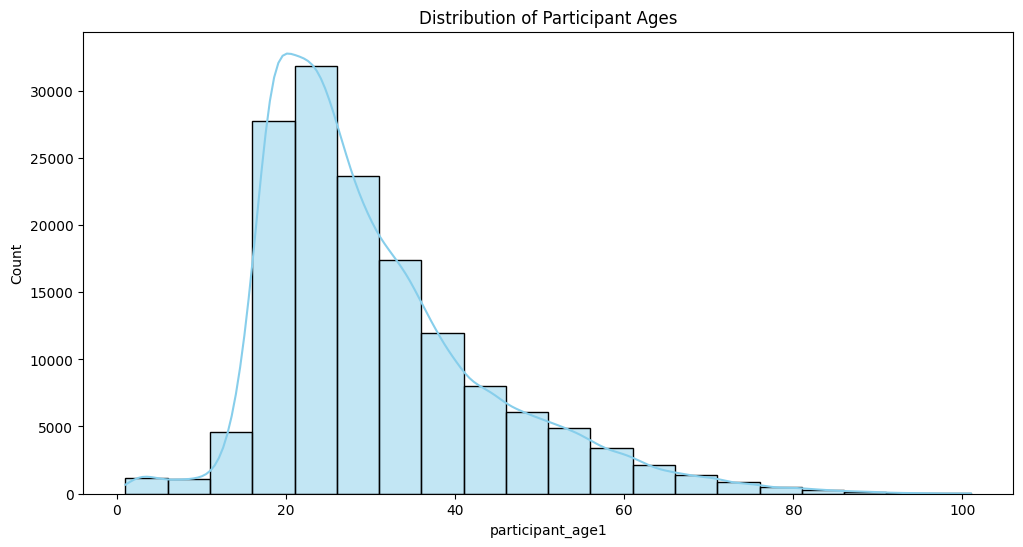

In [597]:
plt.figure(figsize=(12, 6))
sns.histplot(data=incidents_dataset, x='participant_age1', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Participant Ages')
plt.show()

### Distribution of participant gender

Then we will analyze the gender of the participants. There are male and female values, but we also have an entry with the gender 'Male, female'. Since it is just one entry, and to simplify the analysis, we will remove this entry, converting in to "Male" and just have female and male categories.

In [598]:
gender_counts = incidents_dataset['participant_gender1'].value_counts()

# Print the counts
print("Gender Distribution:")
print(gender_counts)

Gender Distribution:
participant_gender1
Male            127159
Female           19791
Male, female         1
Name: count, dtype: int64


In [599]:
# Remove rows with 'participant_gender1' equal to "Male, female"
# Replace the column values where 'participant_gender1' is "Male, female" with "Male"
incidents_dataset['participant_gender1'] = incidents_dataset['participant_gender1'].replace("Male, female", "Male")

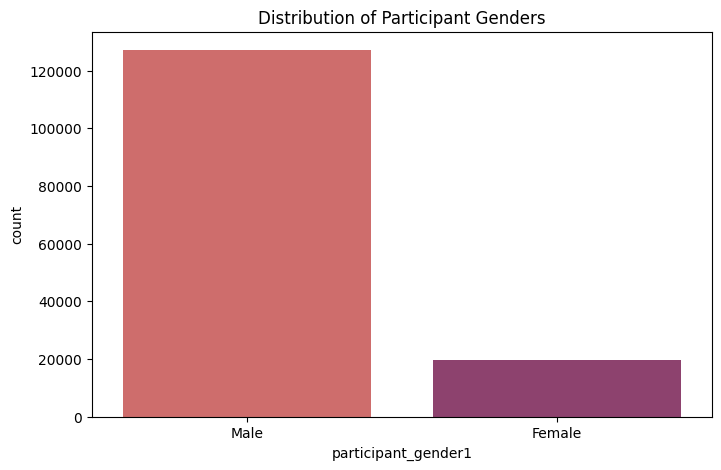

In [600]:
plt.figure(figsize=(8, 5))
sns.countplot(data=incidents_dataset, x='participant_gender1', palette='flare', hue='participant_gender1', legend=False)
plt.title('Distribution of Participant Genders')
plt.show()

### Number of Participants and Casualties

In the next graph we show the distribution of the number of participants, and the number of injured, killed, arrested and unharmed participants. Even tough there are some outliers, the distribution is skewed to the right, since in most cases the number of participants is low and, on the contrary, there are very few cases with a large number of participants.

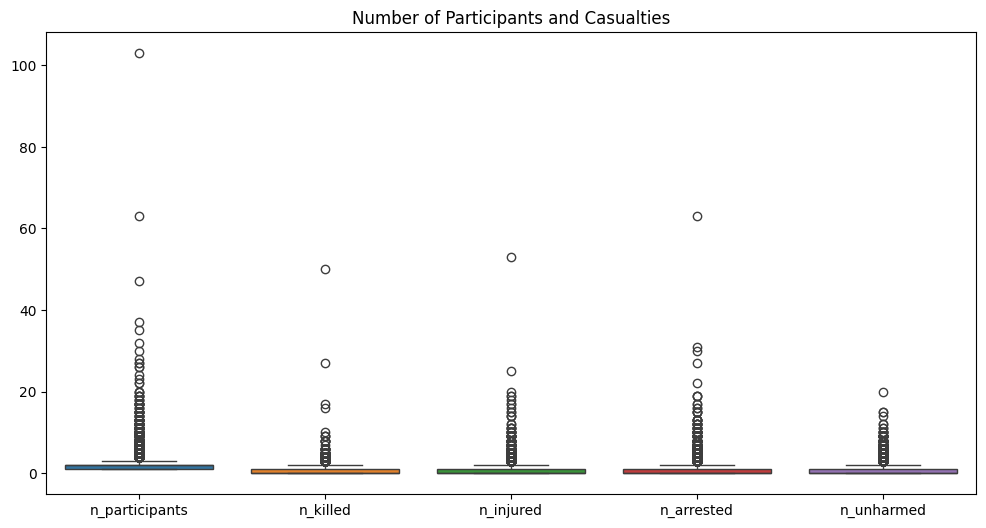

In [601]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=incidents_dataset[['n_participants', 'n_killed', 'n_injured','n_arrested', 'n_unharmed']])
plt.title('Number of Participants and Casualties')
plt.show()

### Incident Characteristics

In the next graph the top 10 most occurred incidents will be displayed, to see which where the main ones.

- Number of different incident characteristics: 50


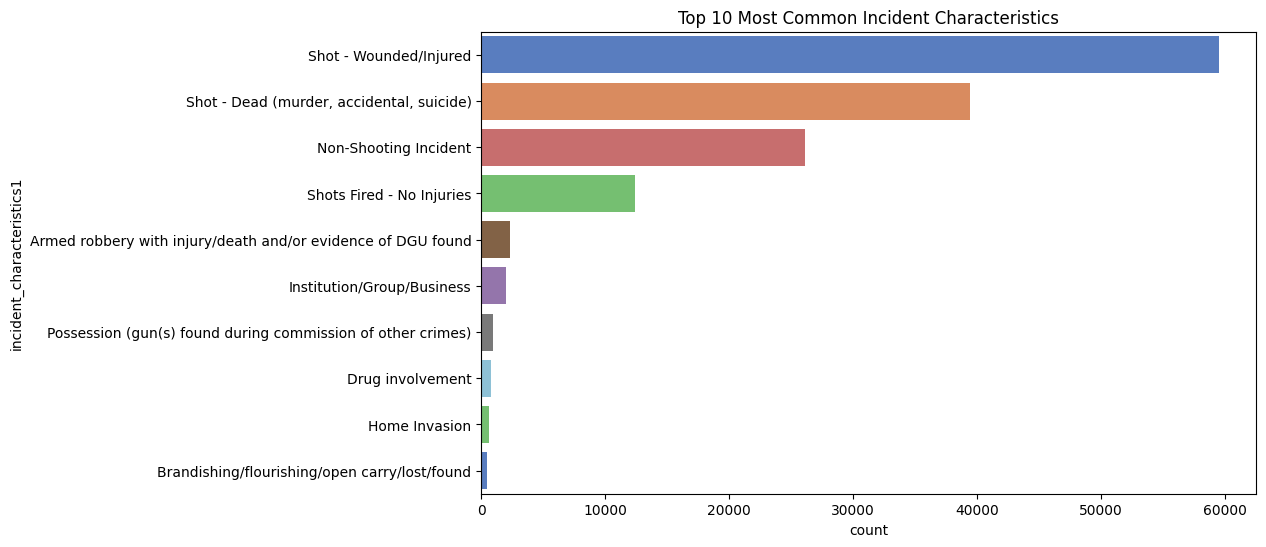

In [602]:
# Get the total number of different incident characteristics and print them
total_characteristics = incidents_dataset['incident_characteristics1'].nunique()
print('- Number of different incident characteristics: ' + str(total_characteristics))

# Get the top 10 most common incident characteristics
top10_characteristics = incidents_dataset['incident_characteristics1'].value_counts().nlargest(10).index

# Create a countplot with the top 10 incident characteristics
plt.figure(figsize=(10, 6))
sns.countplot(data=incidents_dataset, y='incident_characteristics1', order=top10_characteristics, palette='muted', hue='incident_characteristics1', legend=False)
plt.title('Top 10 Most Common Incident Characteristics')
plt.show()


## Pairwise correlation

To perform pairwise correlation analysis, `corr()` function of `pandas` can be used, to compute the correlation matrix and then visualize it using a heatmap.

The goal of pairwise correlation analysis is to understand the linear relationship between pairs of variables. The correlation coefficient ranges from -1 to 1, where:

- 1 indicates a perfect positive correlation.
- -1 indicates a perfect negative correlation.
- 0 indicates no correlation.

In the pairwise correlation matrix of the incidents dataset we do not have many interesting correlations to consider. We can observe a strong positive correlation with all the variables that measure the age, but that is obvious so it is not considerable. The most interesting fact could be the correlation between the incidents consequences and the gender. There is a stronger correlation between the consequences (`n_killed`, `n_arrested`, `n_injured`...) and  males than females.

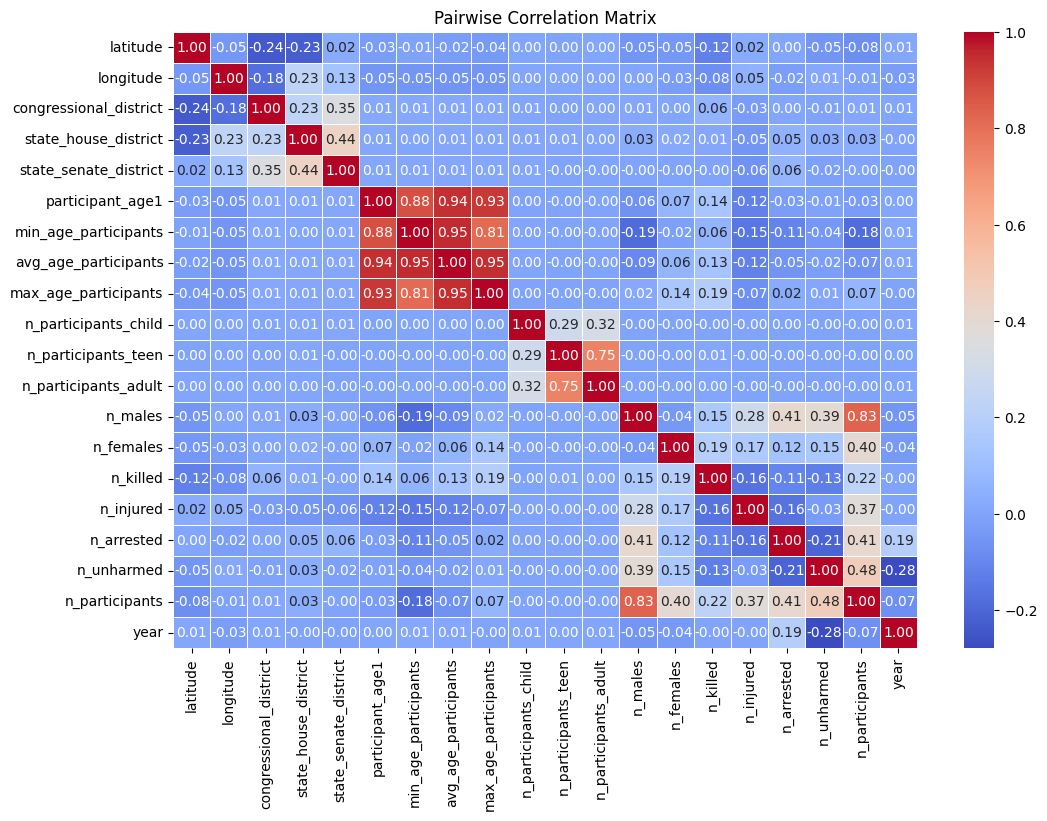

In [603]:
# Select numerical columns for correlation analysis
numerical_columns = incidents_dataset.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pairwise Correlation Matrix')
plt.show()

### Incidents and elections correlation

Checking the correlation matrix between the incidents and the elections, we can not say that there is any correlation to consider, since all the values are around 0.

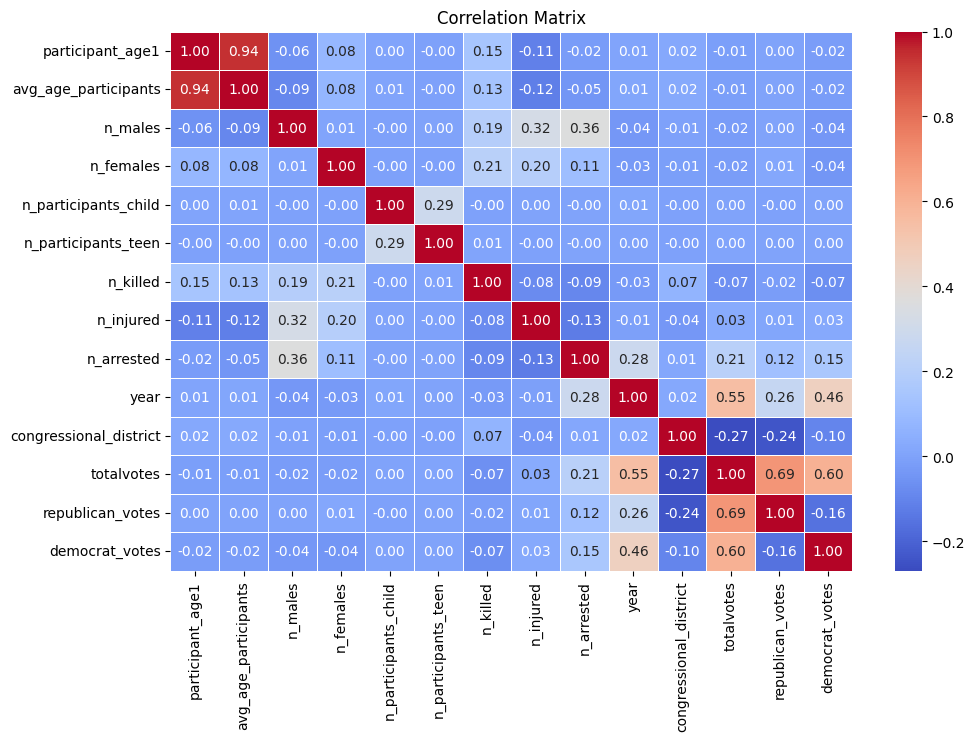

In [604]:
# Define columns of interest in incidents dataset
incidents_columns_of_interest = [
    'participant_age1', 'avg_age_participants', 'n_males', 'n_females', 
    'n_participants_child', 'n_participants_teen', 'n_killed', 'n_injured', 'n_arrested'
]

# Merge datasets on common keys
merged_dataset = pd.merge(
    incidents_dataset[incidents_columns_of_interest],
    ysdh_dataset,
    left_on=[incidents_dataset['state'], incidents_dataset['date'].dt.year],
    right_on=['state', 'year']
)

# Select numerical columns for correlation analysis
numerical_columns_merged = merged_dataset.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix_merged = numerical_columns_merged.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(11, 7))
sns.heatmap(correlation_matrix_merged, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


### Incidents and poverty rates correlation

In the case of the incidents and poverty rates, there is no clear correlation either.

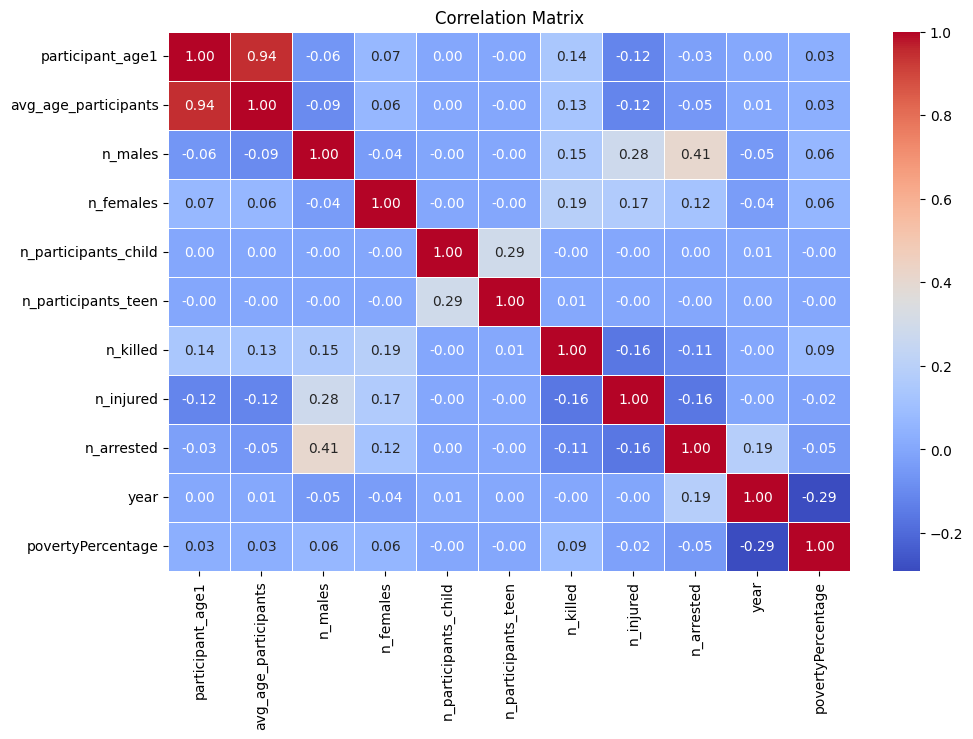

In [605]:
# Merge datasets on common keys
merged_dataset = pd.merge(
    incidents_dataset[incidents_columns_of_interest],
    pbsy_dataset_only_states,
    left_on=[incidents_dataset['state'], incidents_dataset['date'].dt.year],
    right_on=['state', 'year']
)

# Select numerical columns for correlation analysis
numerical_columns_merged = merged_dataset.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix_merged = numerical_columns_merged.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(11, 7))
sns.heatmap(correlation_matrix_merged, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### Poverty rates and elections correlation

In the case of the correlation between poverty rates and elections, even tough there is no a really clear and obvious correlation, we can observe an interesting difference between the correlation of the poverty percentage and the political party votes.

The poverty percentage has a negative correlation of -0.36 with democrat votes, while the correlation with republican votes is close to zero, -0.08.

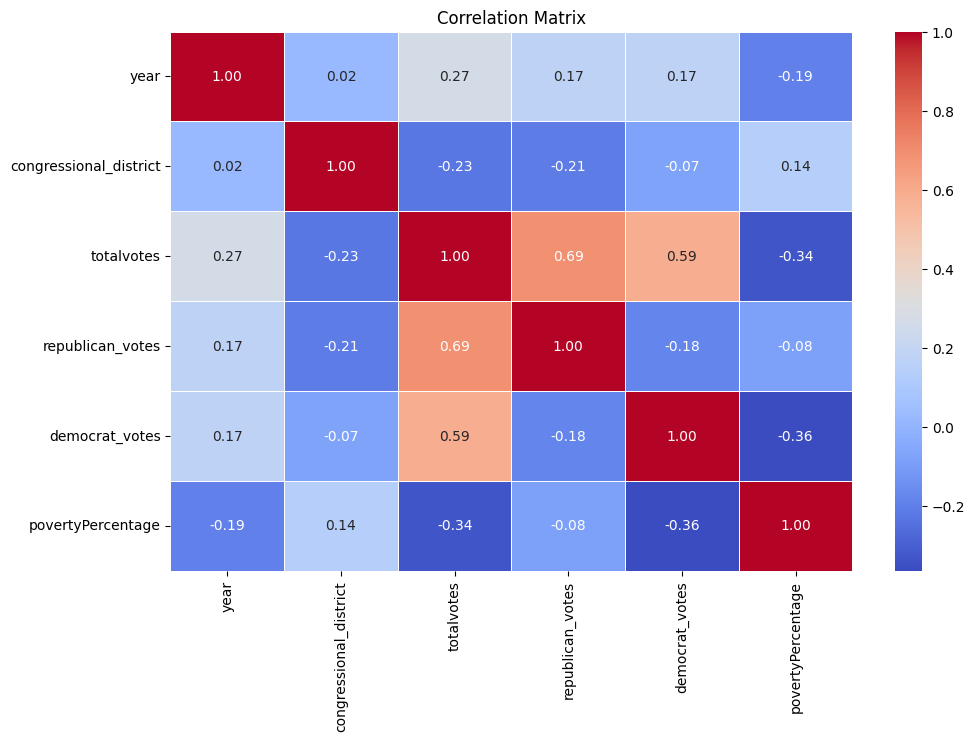

In [606]:
# Merge datasets on common keys
merged_dataset = pd.merge(
    ysdh_dataset,
    pbsy_dataset_only_states,
    left_on=['state', 'year'],
    right_on=['state', 'year']
)

# Select numerical columns for correlation analysis
numerical_columns_merged = merged_dataset.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix_merged = numerical_columns_merged.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(11, 7))
sns.heatmap(correlation_matrix_merged, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## New feature extraction

After making many modifications to the datasets, to conclude the data preparation aspect, we are going to improve the quality of the data, increasing the knowledge about it in order to extract new interesting features to describe the incidents. To do so, we are going to obtain several indicators for an incident by evaluating multiple aspects.

The first question that has been addressed is the following:

*How many males are involved in the incident w.r.t. the total number of males involved in incidents for the same city and in the same period?*

In this case the period that we will analyze will be a year, so first, we add a new column representing the year extracted from the 'date' column. Subsequently, we group the dataset by city and year, calculating the total number of males involved in incidents for each combination. The total male information is then merged back into the original dataset (`n_males_total` column). To ensure accurate proportions in the subsequent calculations, any NaN or zero values in the total male column are replaced with 1. The function proceeds to compute the proportion of males involved in each incident (`proportion_males`), considering the total numbers.

In [607]:
# Create a new column for the year
incidents_dataset['year'] = incidents_dataset['date'].dt.year

# Group by city and year, calculate total males involved in incidents
total_males_per_city_year = incidents_dataset.groupby(['city_or_county', 'year'])['n_males'].sum().reset_index()

# Merge total males information back into the original dataset
incidents_with_total_males = pd.merge(
    incidents_dataset,
    total_males_per_city_year,
    on=['city_or_county', 'year'],
    suffixes=('', '_total')
)

# Replace NaN or zero values in 'n_males_total' with 1 to avoid division issues
incidents_with_total_males['n_males_total'].replace({0: 1}, inplace=True)

# Calculate the proportion of males involved in each incident
incidents_with_total_males['proportion_males'] = (
    incidents_with_total_males['n_males'] / incidents_with_total_males['n_males_total']
)

# Display the result (you can adjust the columns displayed as needed)
result_columns = ['date', 'city_or_county', 'n_males', 'n_males_total', 'proportion_males', 'incident_characteristics1']
result = incidents_with_total_males[result_columns].sort_values(by=['city_or_county', 'date'])

# Display the result to check if the proportions are correct
print(result.head())


             date city_or_county  n_males  n_males_total  proportion_males  \
136548 2014-06-23      Abbeville      3.0            8.0             0.375   
136550 2014-09-14      Abbeville      2.0            8.0             0.250   
136549 2014-11-25      Abbeville      3.0            8.0             0.375   
126861 2016-02-21      Abbeville      2.0            8.0             0.250   
126862 2016-08-04      Abbeville      1.0            8.0             0.125   

                                incident_characteristics1  
136548          Shot - Dead (murder, accidental, suicide)  
136550                             Shot - Wounded/Injured  
136549  Possession (gun(s) found during commission of ...  
126861                             Shot - Wounded/Injured  
126862                              Non-Shooting Incident  


With the previous modified dataset we can see the information of the proportion of males in incidents in a specific city. For testing we set manually the name of the city, but the user can modify it including the name of the desired city.

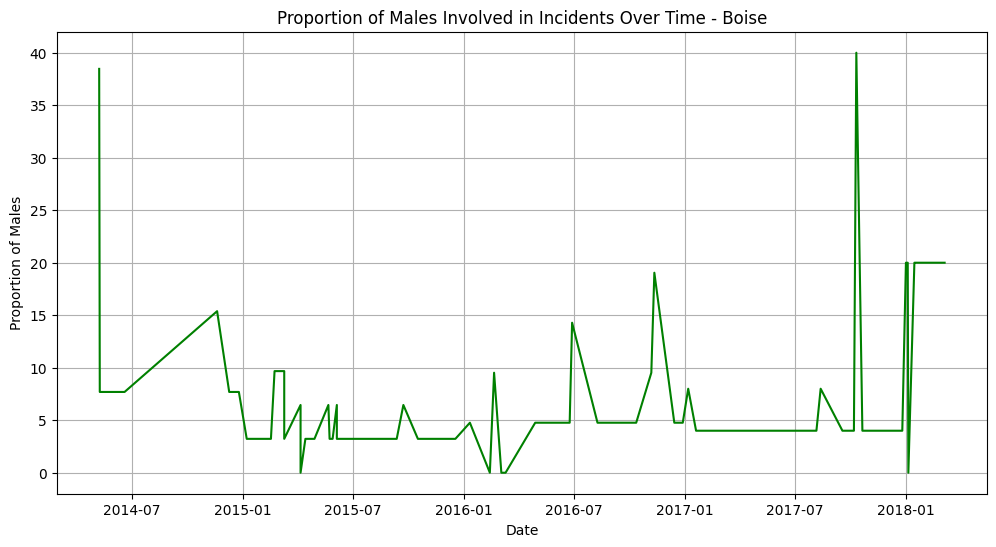

In [608]:
# Sort data by date
incidents_with_total_males = incidents_with_total_males.sort_values(by='date')

# Plot the proportion of males over time for a specific city
# (For testing we specify manually the name of the city, but in production, user will be able to specify the city that he wants)
city_to_plot = 'Boise'
#city_to_plot = input('Introduce the name of a city: ')

# Filter data for the selected city
city_data = incidents_with_total_males[incidents_with_total_males['city_or_county'] == city_to_plot]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(city_data['date'], city_data['proportion_males'] * 100, linestyle='-', color='g')
plt.title(f'Proportion of Males Involved in Incidents Over Time - {city_to_plot}')
plt.xlabel('Date')
plt.ylabel('Proportion of Males')
plt.grid(True)
plt.show()

Next question was the next one:

*How many injured and killed people have been involved w.r.t the total injured and killed people in the same congressional district in a given period of time?*

The approach to achieve the result of this question has been similar as the previous one. To start, we have grouped the incidents dataset based on the congressional district and year, calculating the total number of individuals injured and killed in incidents for each combination. This information is then merged back into the original dataset. As it was done in the previous case, any NaN or zero values in the total injured and killed columns are replaced with 1. The function proceeds to compute the proportion of injured and killed people involved in each incident, considering the total numbers. With this data, the new dataset has 4 more columns: `n_injured_total`, `n_killed_total`, `proportion_injured` and `proportion_killed`. Finally, the dataset is filtered for a specific congressional district (specified as 1 for testing, but it can be set by the user), to analyze more detailed information.

In [609]:
# Group by congressional district, year, and calculate total injured and killed people
total_injured_killed_per_district_year = incidents_dataset.groupby(['congressional_district', 'year'])[['n_injured', 'n_killed']].sum().reset_index()

# Merge total injured and killed information back into the original dataset
incidents_with_total_injured_killed = pd.merge(
    incidents_dataset,
    total_injured_killed_per_district_year,
    on=['congressional_district', 'year'],
    suffixes=('', '_total')
)

# Replace NaN or zero values in 'n_injured_total' and 'n_killed_total' with 1 to avoid division issues
incidents_with_total_injured_killed['n_injured_total'].replace({0: 1}, inplace=True)
incidents_with_total_injured_killed['n_killed_total'].replace({0: 1}, inplace=True)

# Calculate the proportion of injured and killed people involved in each incident
incidents_with_total_injured_killed['proportion_injured'] = (
    incidents_with_total_injured_killed['n_injured'] / incidents_with_total_injured_killed['n_injured_total']
)
incidents_with_total_injured_killed['proportion_killed'] = (
    incidents_with_total_injured_killed['n_killed'] / incidents_with_total_injured_killed['n_killed_total']
)

# Filter data for a specific congressional district
# (For testing we specify manually the number of the congressional district, but in production, user will be able to specify the number that he wants)
congressional_district_to_plot = 1
#congressional_district_to_plot = input('Introduce the number of the congressional district: ')


# Filter data for the selected congressional district
incidents_with_total_injured_killed_in_district = incidents_with_total_injured_killed[incidents_with_total_injured_killed['congressional_district'] == congressional_district_to_plot]

print(incidents_with_total_injured_killed_in_district.head())


           date           state        city_or_county  \
6350 2016-08-01        VIRGINIA              Stafford   
6351 2016-10-04  NORTH CAROLINA             Goldsboro   
6352 2016-07-09        ILLINOIS               Chicago   
6353 2016-02-17            OHIO  Cincinnati (Cheviot)   
6354 2016-02-07        ARKANSAS                Austin   

                                        address  latitude  longitude  \
6350  Cool Springs Road and North Kings Highway   38.3008   -77.4469   
6351                           503 Beech Street   35.3878   -77.9875   
6352               500 block of East 88th Place   41.7341   -87.6119   
6353              3300 block of Harrison Avenue   39.1555   -84.6045   
6354                            191 Angel Drive   34.9495   -91.9344   

      congressional_district  state_house_district  state_senate_district  \
6350                     1.0                  28.0                   28.0   
6351                     1.0                  21.0                    

The third part consists on the addition of new columns regarding to the ratios of participant and participants consequences in the incidents: killed, injured, arrested and unharmed people.

To obtain this dataset, we make the calculation of the ratios using the required columns and inserting them in new columns. After including the columns, we have reduced the new dataset columns, to just the ones that we are interested in.

In [610]:
# Calculate the ratio of killed people to participants in each incident
incidents_with_participant_ratios = incidents_dataset.copy()
incidents_with_participant_ratios['kill_participant_ratio'] = incidents_dataset['n_killed'] / incidents_dataset['n_participants']
incidents_with_participant_ratios['injured_participant_ratio'] = incidents_dataset['n_injured'] / incidents_dataset['n_participants']
incidents_with_participant_ratios['arrested_participant_ratio'] = incidents_dataset['n_arrested'] / incidents_dataset['n_participants']
incidents_with_participant_ratios['unharmed_participant_ratio'] = incidents_dataset['n_unharmed'] / incidents_dataset['n_participants']

# Display the result (you can adjust the columns displayed as needed)
result_columns = ['date', 'state', 'city_or_county', 'n_killed', 'kill_participant_ratio',
                  'n_injured', 'injured_participant_ratio', 
                  'n_arrested', 'arrested_participant_ratio',
                  'n_unharmed', 'unharmed_participant_ratio',
                  'n_participants', 'incident_characteristics1']
incidents_with_participant_ratios = incidents_with_participant_ratios[result_columns].sort_values(by='date')

# Print the result
print(incidents_with_participant_ratios.head())

             date     state city_or_county  n_killed  kill_participant_ratio  \
73133  2014-01-01   INDIANA     Fort Wayne         0                     0.0   
24472  2014-01-01   ALABAMA        Gadsden         0                     0.0   
73844  2014-01-01  NEW YORK       Brooklyn         1                     1.0   
82170  2014-01-01   ALABAMA     Tuscaloosa         0                     0.0   
184269 2014-01-01   GEORGIA        Atlanta         0                     0.0   

        n_injured  injured_participant_ratio  n_arrested  \
73133           3                   1.000000         0.0   
24472           1                   1.000000         0.0   
73844           0                   0.000000         0.0   
82170           3                   0.428571         0.0   
184269          0                   0.000000         0.0   

        arrested_participant_ratio  n_unharmed  unharmed_participant_ratio  \
73133                          0.0         0.0                    0.000000   
24

As an example of visualization of the previous dataset, we have created the next plot, which shows the average ratios of the incident consequences for a specific city (As it done before, it is set manually for testing, but it can be customized).

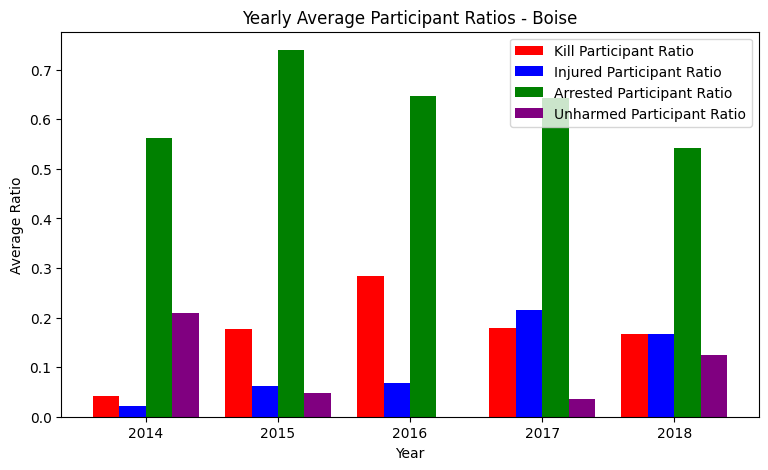

In [611]:
# Choose a specific city for filtering
selected_city = 'Boise'
#selected_city = input('Introduce the name of a city: ')

# Filter data for the selected city
city_data = incidents_with_participant_ratios[incidents_with_participant_ratios['city_or_county'] == selected_city]

# Group by year and calculate the average ratios
average_ratios_per_year = city_data.groupby(city_data['date'].dt.year)[
    ['kill_participant_ratio', 'injured_participant_ratio', 'arrested_participant_ratio', 'unharmed_participant_ratio']
].mean().reset_index()

# Plotting
plt.figure(figsize=(9, 5))
bar_width = 0.2
bar_locations = range(len(average_ratios_per_year['date']))

plt.bar(bar_locations, average_ratios_per_year['kill_participant_ratio'], width=bar_width, label='Kill Participant Ratio', color='r')
plt.bar([i + bar_width for i in bar_locations], average_ratios_per_year['injured_participant_ratio'], width=bar_width, label='Injured Participant Ratio', color='b')
plt.bar([i + 2 * bar_width for i in bar_locations], average_ratios_per_year['arrested_participant_ratio'], width=bar_width, label='Arrested Participant Ratio', color='g')
plt.bar([i + 3 * bar_width for i in bar_locations], average_ratios_per_year['unharmed_participant_ratio'], width=bar_width, label='Unharmed Participant Ratio', color='purple')

plt.title(f'Yearly Average Participant Ratios - {selected_city}')
plt.xlabel('Year')
plt.ylabel('Average Ratio')
plt.xticks([i + 1.5 * bar_width for i in bar_locations], average_ratios_per_year['date'])
plt.legend()
plt.show()

To conclude with the exploration of new features we have calculated the average age of participants in incidents for each city or state to then examine how it changes over different periods.

After creating the dataset with the average age participants of the dataset grouped by city and year, we display the results with three cities to compare. This way, in the plot we can see the difference between the evolution of participants average age over the different cities.

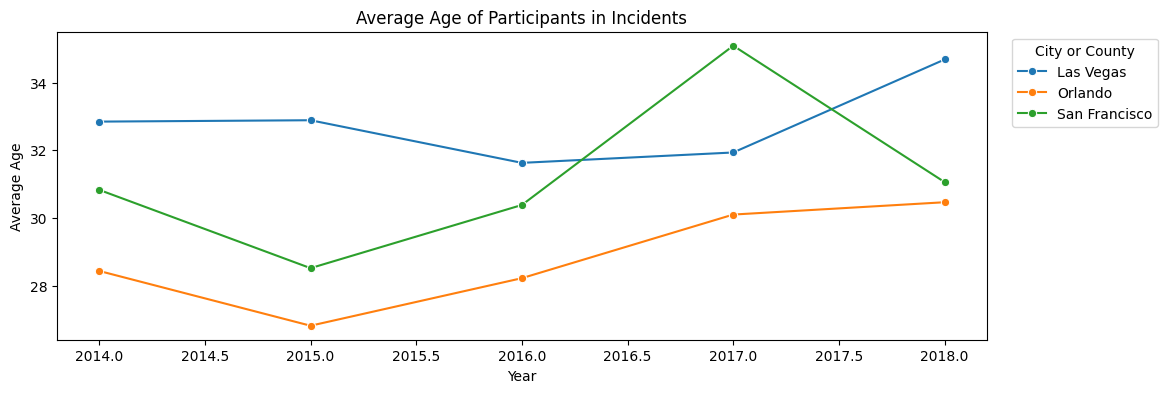

In [612]:
# Create a new column for the year
incidents_dataset['year'] = incidents_dataset['date'].dt.year

# Group by city, state, and year, calculate the average age of participants
average_age_per_city_year = incidents_dataset.groupby(['city_or_county', 'year'])['avg_age_participants'].mean().reset_index()

# List of cities to compare
cities_to_compare = ['San Francisco', 'Las Vegas', 'Orlando']

# Filter data for the selected cities
average_age_per_city_year = average_age_per_city_year[average_age_per_city_year['city_or_county'].isin(cities_to_compare)]

# Plotting the average age over different periods for selected cities
plt.figure(figsize=(12, 4))
sns.lineplot(x='year', y='avg_age_participants', hue='city_or_county', data=average_age_per_city_year, marker='o')
plt.title('Average Age of Participants in Incidents')
plt.xlabel('Year')
plt.ylabel('Average Age')
plt.legend(title='City or County', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

In order to improve the new features obtained in the previous exploration, we add some modifications to the previous approach. Here the function groups the dataset by incident characteristic, city and year, and then calculates the average age of the participants. This dataset is filtered by desired incident types and cities. Then the result is shown in a graph where we can observe the differences in average ages of the different cities and incident types.

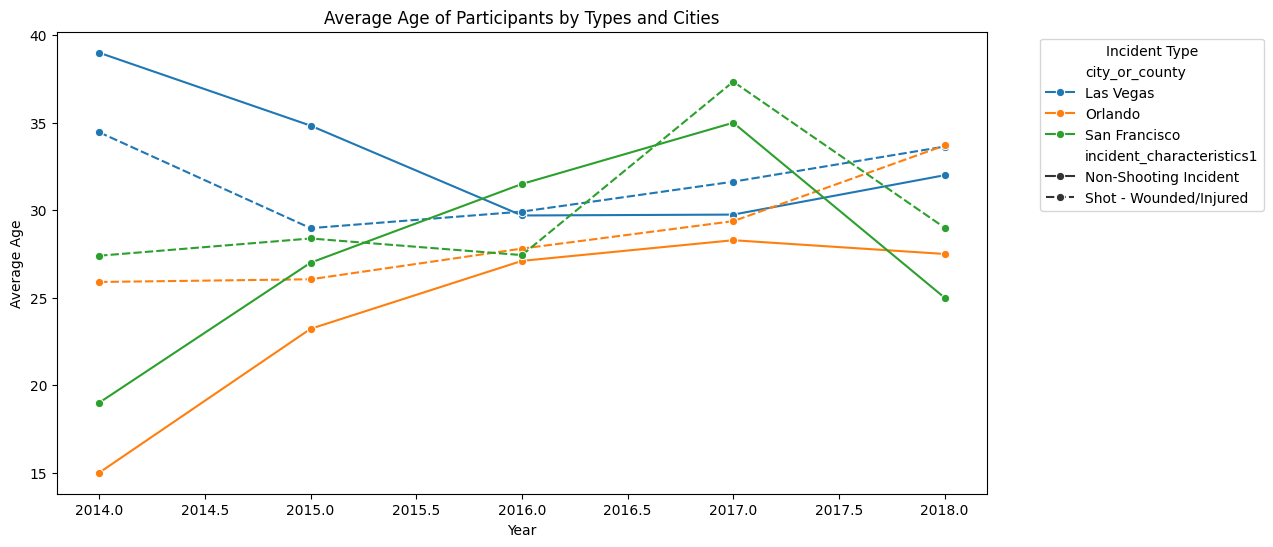

In [613]:
# Group by incident characteristics, city, and year, and calculate the average age of participants
average_age_per_incident_type_city_year = incidents_dataset.groupby(['incident_characteristics1', 'city_or_county', 'year'])['avg_age_participants'].mean().reset_index()

# List of incident types to compare
incident_types_to_compare = ['Shot - Wounded/Injured', 'Non-Shooting Incident']

# List of cities to compare
cities_to_compare = ['San Francisco', 'Las Vegas', 'Orlando']

# Filter data for the selected incident types and cities
average_age_per_incident_type_city_year = average_age_per_incident_type_city_year[
    (average_age_per_incident_type_city_year['incident_characteristics1'].isin(incident_types_to_compare)) &
    (average_age_per_incident_type_city_year['city_or_county'].isin(cities_to_compare))
]

# Plotting the average age over different periods for selected incident types and cities
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='avg_age_participants', hue='city_or_county', 
             style='incident_characteristics1', data=average_age_per_incident_type_city_year, marker='o', errorbar=None)
plt.title('Average Age of Participants by Types and Cities')
plt.xlabel('Year')
plt.ylabel('Average Age')
plt.legend(title='Incident Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Data Export

We will export the modified datasets to *.csv* files, because we will use them in the next tasks notebooks.

In [614]:
incidents_dataset.to_csv('../project_datasets/incidents_v2.csv', index=False)
pbsy_dataset.to_csv('../project_datasets/povertyByStateYear_v2.csv', index=False)
ysdh_dataset.to_csv('../project_datasets/year_state_district_house_v2.csv', index=False)